# Deep Q-Learning 

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [1]:
!pip3 install gym pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip3 install --upgrade setuptools --user
!pip3 install ez_setup 
!pip3 install gym[atari] 
!pip3 install gym[accept-rom-license] 

In [1]:
!pip install gym==0.25.2

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [1]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import importlib
import matplotlib.pyplot as plt
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN
from config import *
# %load_ext autoreload
# %autoreload 2

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://www.gymlibrary.dev/environments/atari/breakout/. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [2]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

C:\Users\ziyet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\ziyet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

C:\Users\ziyet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Users\ziyet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [4]:
double_dqn = False # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

In [5]:
torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

device(type='cpu')

### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4404\2880046822.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4404\2880046822.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:


episode: 0   score: 2.0   memory length: 215   epsilon: 1.0    steps: 215    lr: 0.0001     evaluation reward: 2.0
episode: 1   score: 0.0   memory length: 337   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.0
episode: 2   score: 2.0   memory length: 555   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.3333333333333333
episode: 3   score: 2.0   memory length: 774   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.5
episode: 4   score: 2.0   memory length: 975   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.6
episode: 5   score: 2.0   memory length: 1195   epsilon: 1.0    steps: 220    lr: 0.0001     evaluation reward: 1.6666666666666667
episode: 6   score: 2.0   memory length: 1412   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.7142857142857142
episode: 7   score: 3.0   memory length: 1657   epsilon: 1.0    steps: 245    lr: 0.0001     evaluation reward: 1.875
episode: 8   score: 3.0   memo

episode: 64   score: 1.0   memory length: 11717   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.4153846153846155
episode: 65   score: 3.0   memory length: 11964   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.4393939393939394
episode: 66   score: 1.0   memory length: 12133   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.4328358208955223
episode: 67   score: 2.0   memory length: 12349   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.4411764705882353
episode: 68   score: 0.0   memory length: 12472   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4202898550724639
episode: 69   score: 0.0   memory length: 12595   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 70   score: 3.0   memory length: 12841   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.4225352112676057
episode: 71   score: 0.0   memory length: 12964   epsilon: 1.0    steps: 123    lr: 

episode: 129   score: 2.0   memory length: 23714   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.54
episode: 130   score: 4.0   memory length: 23991   epsilon: 1.0    steps: 277    lr: 0.0001     evaluation reward: 1.56
episode: 131   score: 3.0   memory length: 24237   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.55
episode: 132   score: 4.0   memory length: 24533   epsilon: 1.0    steps: 296    lr: 0.0001     evaluation reward: 1.58
episode: 133   score: 3.0   memory length: 24778   epsilon: 1.0    steps: 245    lr: 0.0001     evaluation reward: 1.58
episode: 134   score: 2.0   memory length: 24995   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.59
episode: 135   score: 2.0   memory length: 25213   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.61
episode: 136   score: 0.0   memory length: 25336   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.61
episode: 137   score: 0.0   memory lengt

episode: 198   score: 1.0   memory length: 36872   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.68
episode: 199   score: 3.0   memory length: 37118   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.7
episode: 200   score: 1.0   memory length: 37288   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.7
episode: 201   score: 3.0   memory length: 37532   epsilon: 1.0    steps: 244    lr: 0.0001     evaluation reward: 1.71
episode: 202   score: 2.0   memory length: 37730   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.71
episode: 203   score: 1.0   memory length: 37902   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.69
episode: 204   score: 0.0   memory length: 38025   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.68
episode: 205   score: 2.0   memory length: 38242   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.68
episode: 206   score: 0.0   memory length:

episode: 267   score: 2.0   memory length: 50385   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.63
episode: 268   score: 1.0   memory length: 50554   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.64
episode: 269   score: 3.0   memory length: 50805   epsilon: 1.0    steps: 251    lr: 0.0001     evaluation reward: 1.67
episode: 270   score: 0.0   memory length: 50928   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.65
episode: 271   score: 1.0   memory length: 51100   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.64
episode: 272   score: 1.0   memory length: 51250   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.62
episode: 273   score: 1.0   memory length: 51419   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.63
episode: 274   score: 2.0   memory length: 51636   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.63
episode: 275   score: 2.0   memory lengt

episode: 336   score: 2.0   memory length: 62536   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.49
episode: 337   score: 4.0   memory length: 62792   epsilon: 1.0    steps: 256    lr: 0.0001     evaluation reward: 1.5
episode: 338   score: 0.0   memory length: 62915   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.47
episode: 339   score: 0.0   memory length: 63038   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.47
episode: 340   score: 0.0   memory length: 63161   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.44
episode: 341   score: 2.0   memory length: 63360   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.44
episode: 342   score: 0.0   memory length: 63483   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 343   score: 3.0   memory length: 63711   epsilon: 1.0    steps: 228    lr: 0.0001     evaluation reward: 1.42
episode: 344   score: 1.0   memory length:

episode: 405   score: 2.0   memory length: 75156   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.51
episode: 406   score: 0.0   memory length: 75279   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.49
episode: 407   score: 1.0   memory length: 75449   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.47
episode: 408   score: 4.0   memory length: 75746   epsilon: 1.0    steps: 297    lr: 0.0001     evaluation reward: 1.5
episode: 409   score: 3.0   memory length: 75992   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.53
episode: 410   score: 2.0   memory length: 76189   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.51
episode: 411   score: 1.0   memory length: 76339   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.51
episode: 412   score: 2.0   memory length: 76518   epsilon: 1.0    steps: 179    lr: 0.0001     evaluation reward: 1.52
episode: 413   score: 2.0   memory length

episode: 474   score: 2.0   memory length: 88156   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.62
episode: 475   score: 2.0   memory length: 88353   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.64
episode: 476   score: 2.0   memory length: 88552   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.64
episode: 477   score: 1.0   memory length: 88703   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.64
episode: 478   score: 2.0   memory length: 88884   epsilon: 1.0    steps: 181    lr: 0.0001     evaluation reward: 1.65
episode: 479   score: 2.0   memory length: 89102   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.65
episode: 480   score: 1.0   memory length: 89271   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.66
episode: 481   score: 2.0   memory length: 89468   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.66
episode: 482   score: 2.0   memory lengt

C:\assignment5\assignment5_materials\memory.py:30: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  sample = np.array(sample, dtype = object)
C:\assignment5\assignment5_materials\agent.py:63: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array c

episode: 540   score: 1.0   memory length: 100035   epsilon: 0.9999287200000015    steps: 171    lr: 0.0001     evaluation reward: 1.48
episode: 541   score: 0.0   memory length: 100158   epsilon: 0.9996851800000068    steps: 123    lr: 0.0001     evaluation reward: 1.47
episode: 542   score: 2.0   memory length: 100376   epsilon: 0.9992535400000162    steps: 218    lr: 0.0001     evaluation reward: 1.47
episode: 543   score: 2.0   memory length: 100593   epsilon: 0.9988238800000255    steps: 217    lr: 0.0001     evaluation reward: 1.48
episode: 544   score: 4.0   memory length: 100870   epsilon: 0.9982754200000374    steps: 277    lr: 0.0001     evaluation reward: 1.5
episode: 545   score: 2.0   memory length: 101050   epsilon: 0.9979190200000452    steps: 180    lr: 0.0001     evaluation reward: 1.52
episode: 546   score: 0.0   memory length: 101172   epsilon: 0.9976774600000504    steps: 122    lr: 0.0001     evaluation reward: 1.52
episode: 547   score: 2.0   memory length: 101388

episode: 601   score: 2.0   memory length: 111455   epsilon: 0.9773171200004924    steps: 198    lr: 0.0001     evaluation reward: 1.42
episode: 602   score: 3.0   memory length: 111704   epsilon: 0.9768241000005031    steps: 249    lr: 0.0001     evaluation reward: 1.45
episode: 603   score: 1.0   memory length: 111874   epsilon: 0.9764875000005104    steps: 170    lr: 0.0001     evaluation reward: 1.45
episode: 604   score: 1.0   memory length: 112043   epsilon: 0.9761528800005177    steps: 169    lr: 0.0001     evaluation reward: 1.45
episode: 605   score: 1.0   memory length: 112212   epsilon: 0.975818260000525    steps: 169    lr: 0.0001     evaluation reward: 1.45
episode: 606   score: 0.0   memory length: 112335   epsilon: 0.9755747200005302    steps: 123    lr: 0.0001     evaluation reward: 1.45
episode: 607   score: 1.0   memory length: 112506   epsilon: 0.9752361400005376    steps: 171    lr: 0.0001     evaluation reward: 1.44
episode: 608   score: 2.0   memory length: 112724

episode: 662   score: 2.0   memory length: 123178   epsilon: 0.9541055800009963    steps: 219    lr: 0.0001     evaluation reward: 1.67
episode: 663   score: 0.0   memory length: 123300   epsilon: 0.9538640200010016    steps: 122    lr: 0.0001     evaluation reward: 1.65
episode: 664   score: 0.0   memory length: 123422   epsilon: 0.9536224600010068    steps: 122    lr: 0.0001     evaluation reward: 1.65
episode: 665   score: 1.0   memory length: 123593   epsilon: 0.9532838800010142    steps: 171    lr: 0.0001     evaluation reward: 1.63
episode: 666   score: 2.0   memory length: 123791   epsilon: 0.9528918400010227    steps: 198    lr: 0.0001     evaluation reward: 1.65
episode: 667   score: 3.0   memory length: 124054   epsilon: 0.952371100001034    steps: 263    lr: 0.0001     evaluation reward: 1.66
episode: 668   score: 1.0   memory length: 124205   epsilon: 0.9520721200010405    steps: 151    lr: 0.0001     evaluation reward: 1.66
episode: 669   score: 1.0   memory length: 124377

episode: 723   score: 2.0   memory length: 134398   epsilon: 0.9318899800014786    steps: 198    lr: 0.0001     evaluation reward: 1.59
episode: 724   score: 1.0   memory length: 134568   epsilon: 0.9315533800014859    steps: 170    lr: 0.0001     evaluation reward: 1.59
episode: 725   score: 1.0   memory length: 134736   epsilon: 0.9312207400014931    steps: 168    lr: 0.0001     evaluation reward: 1.59
episode: 726   score: 0.0   memory length: 134859   epsilon: 0.9309772000014984    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 727   score: 0.0   memory length: 134982   epsilon: 0.9307336600015037    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 728   score: 0.0   memory length: 135105   epsilon: 0.930490120001509    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 729   score: 1.0   memory length: 135255   epsilon: 0.9301931200015154    steps: 150    lr: 0.0001     evaluation reward: 1.56
episode: 730   score: 2.0   memory length: 135437

episode: 784   score: 2.0   memory length: 145173   epsilon: 0.9105554800019418    steps: 198    lr: 0.0001     evaluation reward: 1.47
episode: 785   score: 2.0   memory length: 145391   epsilon: 0.9101238400019511    steps: 218    lr: 0.0001     evaluation reward: 1.48
episode: 786   score: 2.0   memory length: 145609   epsilon: 0.9096922000019605    steps: 218    lr: 0.0001     evaluation reward: 1.46
episode: 787   score: 0.0   memory length: 145731   epsilon: 0.9094506400019657    steps: 122    lr: 0.0001     evaluation reward: 1.46
episode: 788   score: 0.0   memory length: 145854   epsilon: 0.909207100001971    steps: 123    lr: 0.0001     evaluation reward: 1.45
episode: 789   score: 0.0   memory length: 145977   epsilon: 0.9089635600019763    steps: 123    lr: 0.0001     evaluation reward: 1.43
episode: 790   score: 0.0   memory length: 146099   epsilon: 0.9087220000019816    steps: 122    lr: 0.0001     evaluation reward: 1.41
episode: 791   score: 1.0   memory length: 146268

episode: 845   score: 0.0   memory length: 156144   epsilon: 0.8888329000024133    steps: 122    lr: 0.0001     evaluation reward: 1.4
episode: 846   score: 7.0   memory length: 156463   epsilon: 0.888201280002427    steps: 319    lr: 0.0001     evaluation reward: 1.47
episode: 847   score: 0.0   memory length: 156586   epsilon: 0.8879577400024323    steps: 123    lr: 0.0001     evaluation reward: 1.45
episode: 848   score: 4.0   memory length: 156863   epsilon: 0.8874092800024442    steps: 277    lr: 0.0001     evaluation reward: 1.48
episode: 849   score: 1.0   memory length: 157033   epsilon: 0.8870726800024515    steps: 170    lr: 0.0001     evaluation reward: 1.48
episode: 850   score: 1.0   memory length: 157184   epsilon: 0.886773700002458    steps: 151    lr: 0.0001     evaluation reward: 1.49
episode: 851   score: 2.0   memory length: 157399   epsilon: 0.8863480000024673    steps: 215    lr: 0.0001     evaluation reward: 1.49
episode: 852   score: 2.0   memory length: 157583  

episode: 906   score: 0.0   memory length: 167751   epsilon: 0.8658510400029122    steps: 122    lr: 0.0001     evaluation reward: 1.63
episode: 907   score: 2.0   memory length: 167948   epsilon: 0.8654609800029207    steps: 197    lr: 0.0001     evaluation reward: 1.65
episode: 908   score: 1.0   memory length: 168100   epsilon: 0.8651600200029272    steps: 152    lr: 0.0001     evaluation reward: 1.64
episode: 909   score: 2.0   memory length: 168298   epsilon: 0.8647679800029358    steps: 198    lr: 0.0001     evaluation reward: 1.65
episode: 910   score: 2.0   memory length: 168495   epsilon: 0.8643779200029442    steps: 197    lr: 0.0001     evaluation reward: 1.67
episode: 911   score: 1.0   memory length: 168647   epsilon: 0.8640769600029508    steps: 152    lr: 0.0001     evaluation reward: 1.68
episode: 912   score: 1.0   memory length: 168815   epsilon: 0.863744320002958    steps: 168    lr: 0.0001     evaluation reward: 1.69
episode: 913   score: 5.0   memory length: 169112

episode: 967   score: 3.0   memory length: 178954   epsilon: 0.8436691000033938    steps: 228    lr: 0.0001     evaluation reward: 1.54
episode: 968   score: 3.0   memory length: 179224   epsilon: 0.8431345000034054    steps: 270    lr: 0.0001     evaluation reward: 1.54
episode: 969   score: 3.0   memory length: 179494   epsilon: 0.842599900003417    steps: 270    lr: 0.0001     evaluation reward: 1.57
episode: 970   score: 0.0   memory length: 179617   epsilon: 0.8423563600034223    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 971   score: 2.0   memory length: 179835   epsilon: 0.8419247200034317    steps: 218    lr: 0.0001     evaluation reward: 1.57
episode: 972   score: 0.0   memory length: 179958   epsilon: 0.841681180003437    steps: 123    lr: 0.0001     evaluation reward: 1.56
episode: 973   score: 0.0   memory length: 180080   epsilon: 0.8414396200034422    steps: 122    lr: 0.0001     evaluation reward: 1.55
episode: 974   score: 2.0   memory length: 180277 

episode: 1028   score: 1.0   memory length: 190785   epsilon: 0.8202437200039023    steps: 168    lr: 0.0001     evaluation reward: 1.61
episode: 1029   score: 2.0   memory length: 190982   epsilon: 0.8198536600039108    steps: 197    lr: 0.0001     evaluation reward: 1.62
episode: 1030   score: 0.0   memory length: 191105   epsilon: 0.8196101200039161    steps: 123    lr: 0.0001     evaluation reward: 1.62
episode: 1031   score: 2.0   memory length: 191302   epsilon: 0.8192200600039246    steps: 197    lr: 0.0001     evaluation reward: 1.63
episode: 1032   score: 1.0   memory length: 191472   epsilon: 0.8188834600039319    steps: 170    lr: 0.0001     evaluation reward: 1.64
episode: 1033   score: 2.0   memory length: 191690   epsilon: 0.8184518200039412    steps: 218    lr: 0.0001     evaluation reward: 1.64
episode: 1034   score: 2.0   memory length: 191908   epsilon: 0.8180201800039506    steps: 218    lr: 0.0001     evaluation reward: 1.66
episode: 1035   score: 0.0   memory lengt

episode: 1088   score: 2.0   memory length: 203017   epsilon: 0.7960243600044281    steps: 198    lr: 0.0001     evaluation reward: 1.86
episode: 1089   score: 1.0   memory length: 203188   epsilon: 0.7956857800044355    steps: 171    lr: 0.0001     evaluation reward: 1.87
episode: 1090   score: 4.0   memory length: 203485   epsilon: 0.7950977200044482    steps: 297    lr: 0.0001     evaluation reward: 1.89
episode: 1091   score: 3.0   memory length: 203731   epsilon: 0.7946106400044588    steps: 246    lr: 0.0001     evaluation reward: 1.91
episode: 1092   score: 0.0   memory length: 203854   epsilon: 0.7943671000044641    steps: 123    lr: 0.0001     evaluation reward: 1.88
episode: 1093   score: 3.0   memory length: 204100   epsilon: 0.7938800200044747    steps: 246    lr: 0.0001     evaluation reward: 1.89
episode: 1094   score: 0.0   memory length: 204223   epsilon: 0.79363648000448    steps: 123    lr: 0.0001     evaluation reward: 1.86
episode: 1095   score: 1.0   memory length:

episode: 1148   score: 0.0   memory length: 213979   epsilon: 0.7743196000048993    steps: 123    lr: 0.0001     evaluation reward: 1.67
episode: 1149   score: 0.0   memory length: 214102   epsilon: 0.7740760600049046    steps: 123    lr: 0.0001     evaluation reward: 1.64
episode: 1150   score: 1.0   memory length: 214253   epsilon: 0.7737770800049111    steps: 151    lr: 0.0001     evaluation reward: 1.65
episode: 1151   score: 3.0   memory length: 214480   epsilon: 0.7733276200049208    steps: 227    lr: 0.0001     evaluation reward: 1.64
episode: 1152   score: 2.0   memory length: 214697   epsilon: 0.7728979600049302    steps: 217    lr: 0.0001     evaluation reward: 1.66
episode: 1153   score: 2.0   memory length: 214915   epsilon: 0.7724663200049395    steps: 218    lr: 0.0001     evaluation reward: 1.66
episode: 1154   score: 2.0   memory length: 215133   epsilon: 0.7720346800049489    steps: 218    lr: 0.0001     evaluation reward: 1.68
episode: 1155   score: 0.0   memory lengt

episode: 1208   score: 2.0   memory length: 225451   epsilon: 0.7516050400053924    steps: 200    lr: 0.0001     evaluation reward: 1.55
episode: 1209   score: 2.0   memory length: 225649   epsilon: 0.7512130000054009    steps: 198    lr: 0.0001     evaluation reward: 1.55
episode: 1210   score: 0.0   memory length: 225771   epsilon: 0.7509714400054062    steps: 122    lr: 0.0001     evaluation reward: 1.53
episode: 1211   score: 0.0   memory length: 225894   epsilon: 0.7507279000054115    steps: 123    lr: 0.0001     evaluation reward: 1.53
episode: 1212   score: 2.0   memory length: 226111   epsilon: 0.7502982400054208    steps: 217    lr: 0.0001     evaluation reward: 1.55
episode: 1213   score: 2.0   memory length: 226309   epsilon: 0.7499062000054293    steps: 198    lr: 0.0001     evaluation reward: 1.55
episode: 1214   score: 1.0   memory length: 226477   epsilon: 0.7495735600054365    steps: 168    lr: 0.0001     evaluation reward: 1.54
episode: 1215   score: 0.0   memory lengt

episode: 1268   score: 2.0   memory length: 237921   epsilon: 0.7269144400059284    steps: 198    lr: 0.0001     evaluation reward: 1.97
episode: 1269   score: 2.0   memory length: 238141   epsilon: 0.7264788400059379    steps: 220    lr: 0.0001     evaluation reward: 1.99
episode: 1270   score: 0.0   memory length: 238264   epsilon: 0.7262353000059432    steps: 123    lr: 0.0001     evaluation reward: 1.97
episode: 1271   score: 1.0   memory length: 238433   epsilon: 0.7259006800059504    steps: 169    lr: 0.0001     evaluation reward: 1.96
episode: 1272   score: 3.0   memory length: 238658   epsilon: 0.7254551800059601    steps: 225    lr: 0.0001     evaluation reward: 1.97
episode: 1273   score: 3.0   memory length: 238925   epsilon: 0.7249265200059716    steps: 267    lr: 0.0001     evaluation reward: 1.96
episode: 1274   score: 0.0   memory length: 239048   epsilon: 0.7246829800059769    steps: 123    lr: 0.0001     evaluation reward: 1.92
episode: 1275   score: 3.0   memory lengt

episode: 1328   score: 0.0   memory length: 249879   epsilon: 0.7032376000064424    steps: 123    lr: 0.0001     evaluation reward: 2.02
episode: 1329   score: 2.0   memory length: 250077   epsilon: 0.7028455600064509    steps: 198    lr: 0.0001     evaluation reward: 2.02
episode: 1330   score: 2.0   memory length: 250275   epsilon: 0.7024535200064594    steps: 198    lr: 0.0001     evaluation reward: 2.02
episode: 1331   score: 3.0   memory length: 250543   epsilon: 0.701922880006471    steps: 268    lr: 0.0001     evaluation reward: 2.03
episode: 1332   score: 2.0   memory length: 250741   epsilon: 0.7015308400064795    steps: 198    lr: 0.0001     evaluation reward: 2.02
episode: 1333   score: 2.0   memory length: 250939   epsilon: 0.701138800006488    steps: 198    lr: 0.0001     evaluation reward: 2.02
episode: 1334   score: 3.0   memory length: 251185   epsilon: 0.7006517200064986    steps: 246    lr: 0.0001     evaluation reward: 2.05
episode: 1335   score: 2.0   memory length:

episode: 1388   score: 2.0   memory length: 262351   epsilon: 0.6785430400069785    steps: 218    lr: 0.0001     evaluation reward: 2.03
episode: 1389   score: 2.0   memory length: 262568   epsilon: 0.6781133800069878    steps: 217    lr: 0.0001     evaluation reward: 2.03
episode: 1390   score: 2.0   memory length: 262766   epsilon: 0.6777213400069964    steps: 198    lr: 0.0001     evaluation reward: 2.03
episode: 1391   score: 3.0   memory length: 263013   epsilon: 0.677232280007007    steps: 247    lr: 0.0001     evaluation reward: 2.04
episode: 1392   score: 3.0   memory length: 263260   epsilon: 0.6767432200070176    steps: 247    lr: 0.0001     evaluation reward: 2.05
episode: 1393   score: 4.0   memory length: 263557   epsilon: 0.6761551600070304    steps: 297    lr: 0.0001     evaluation reward: 2.06
episode: 1394   score: 1.0   memory length: 263707   epsilon: 0.6758581600070368    steps: 150    lr: 0.0001     evaluation reward: 2.02
episode: 1395   score: 3.0   memory length

episode: 1448   score: 3.0   memory length: 275611   epsilon: 0.6522882400075485    steps: 245    lr: 0.0001     evaluation reward: 2.3
episode: 1449   score: 2.0   memory length: 275809   epsilon: 0.651896200007557    steps: 198    lr: 0.0001     evaluation reward: 2.3
episode: 1450   score: 2.0   memory length: 276007   epsilon: 0.6515041600075655    steps: 198    lr: 0.0001     evaluation reward: 2.3
episode: 1451   score: 2.0   memory length: 276205   epsilon: 0.651112120007574    steps: 198    lr: 0.0001     evaluation reward: 2.29
episode: 1452   score: 2.0   memory length: 276402   epsilon: 0.6507220600075825    steps: 197    lr: 0.0001     evaluation reward: 2.29
episode: 1453   score: 0.0   memory length: 276524   epsilon: 0.6504805000075877    steps: 122    lr: 0.0001     evaluation reward: 2.26
episode: 1454   score: 2.0   memory length: 276721   epsilon: 0.6500904400075962    steps: 197    lr: 0.0001     evaluation reward: 2.26
episode: 1455   score: 3.0   memory length: 27

episode: 1508   score: 3.0   memory length: 287676   epsilon: 0.6283995400080671    steps: 270    lr: 0.0001     evaluation reward: 2.1
episode: 1509   score: 3.0   memory length: 287902   epsilon: 0.6279520600080768    steps: 226    lr: 0.0001     evaluation reward: 2.12
episode: 1510   score: 4.0   memory length: 288199   epsilon: 0.6273640000080896    steps: 297    lr: 0.0001     evaluation reward: 2.13
episode: 1511   score: 0.0   memory length: 288321   epsilon: 0.6271224400080948    steps: 122    lr: 0.0001     evaluation reward: 2.11
episode: 1512   score: 4.0   memory length: 288614   epsilon: 0.6265423000081074    steps: 293    lr: 0.0001     evaluation reward: 2.14
episode: 1513   score: 3.0   memory length: 288840   epsilon: 0.6260948200081171    steps: 226    lr: 0.0001     evaluation reward: 2.17
episode: 1514   score: 2.0   memory length: 289038   epsilon: 0.6257027800081256    steps: 198    lr: 0.0001     evaluation reward: 2.16
episode: 1515   score: 1.0   memory length

episode: 1568   score: 2.0   memory length: 300983   epsilon: 0.6020516800086391    steps: 218    lr: 0.0001     evaluation reward: 2.2
episode: 1569   score: 2.0   memory length: 301181   epsilon: 0.6016596400086476    steps: 198    lr: 0.0001     evaluation reward: 2.2
episode: 1570   score: 3.0   memory length: 301409   epsilon: 0.6012082000086574    steps: 228    lr: 0.0001     evaluation reward: 2.21
episode: 1571   score: 2.0   memory length: 301607   epsilon: 0.6008161600086659    steps: 198    lr: 0.0001     evaluation reward: 2.2
episode: 1572   score: 2.0   memory length: 301805   epsilon: 0.6004241200086744    steps: 198    lr: 0.0001     evaluation reward: 2.2
episode: 1573   score: 2.0   memory length: 302003   epsilon: 0.6000320800086829    steps: 198    lr: 0.0001     evaluation reward: 2.18
episode: 1574   score: 3.0   memory length: 302231   epsilon: 0.5995806400086927    steps: 228    lr: 0.0001     evaluation reward: 2.2
episode: 1575   score: 3.0   memory length: 30

episode: 1628   score: 2.0   memory length: 314390   epsilon: 0.5755058200092154    steps: 198    lr: 0.0001     evaluation reward: 2.53
episode: 1629   score: 2.0   memory length: 314588   epsilon: 0.5751137800092239    steps: 198    lr: 0.0001     evaluation reward: 2.52
episode: 1630   score: 4.0   memory length: 314845   epsilon: 0.5746049200092349    steps: 257    lr: 0.0001     evaluation reward: 2.54
episode: 1631   score: 1.0   memory length: 314996   epsilon: 0.5743059400092414    steps: 151    lr: 0.0001     evaluation reward: 2.53
episode: 1632   score: 1.0   memory length: 315147   epsilon: 0.5740069600092479    steps: 151    lr: 0.0001     evaluation reward: 2.54
episode: 1633   score: 3.0   memory length: 315394   epsilon: 0.5735179000092585    steps: 247    lr: 0.0001     evaluation reward: 2.55
episode: 1634   score: 3.0   memory length: 315642   epsilon: 0.5730268600092692    steps: 248    lr: 0.0001     evaluation reward: 2.57
episode: 1635   score: 2.0   memory lengt

episode: 1688   score: 3.0   memory length: 328360   epsilon: 0.5478452200098158    steps: 246    lr: 0.0001     evaluation reward: 2.78
episode: 1689   score: 1.0   memory length: 328530   epsilon: 0.5475086200098231    steps: 170    lr: 0.0001     evaluation reward: 2.76
episode: 1690   score: 3.0   memory length: 328755   epsilon: 0.5470631200098328    steps: 225    lr: 0.0001     evaluation reward: 2.79
episode: 1691   score: 2.0   memory length: 328953   epsilon: 0.5466710800098413    steps: 198    lr: 0.0001     evaluation reward: 2.81
episode: 1692   score: 3.0   memory length: 329203   epsilon: 0.5461760800098521    steps: 250    lr: 0.0001     evaluation reward: 2.82
episode: 1693   score: 3.0   memory length: 329429   epsilon: 0.5457286000098618    steps: 226    lr: 0.0001     evaluation reward: 2.83
episode: 1694   score: 3.0   memory length: 329673   epsilon: 0.5452454800098723    steps: 244    lr: 0.0001     evaluation reward: 2.82
episode: 1695   score: 3.0   memory lengt

episode: 1748   score: 2.0   memory length: 342897   epsilon: 0.5190619600104407    steps: 198    lr: 0.0001     evaluation reward: 3.08
episode: 1749   score: 2.0   memory length: 343094   epsilon: 0.5186719000104492    steps: 197    lr: 0.0001     evaluation reward: 3.08
episode: 1750   score: 4.0   memory length: 343369   epsilon: 0.518127400010461    steps: 275    lr: 0.0001     evaluation reward: 3.09
episode: 1751   score: 3.0   memory length: 343595   epsilon: 0.5176799200104707    steps: 226    lr: 0.0001     evaluation reward: 3.09
episode: 1752   score: 3.0   memory length: 343821   epsilon: 0.5172324400104804    steps: 226    lr: 0.0001     evaluation reward: 3.1
episode: 1753   score: 3.0   memory length: 344068   epsilon: 0.516743380010491    steps: 247    lr: 0.0001     evaluation reward: 3.09
episode: 1754   score: 3.0   memory length: 344294   epsilon: 0.5162959000105007    steps: 226    lr: 0.0001     evaluation reward: 3.1
episode: 1755   score: 3.0   memory length: 3

episode: 1808   score: 0.0   memory length: 357976   epsilon: 0.4892055400107862    steps: 123    lr: 0.0001     evaluation reward: 3.32
episode: 1809   score: 2.0   memory length: 358174   epsilon: 0.4888135000107837    steps: 198    lr: 0.0001     evaluation reward: 3.32
episode: 1810   score: 2.0   memory length: 358371   epsilon: 0.48842344001078125    steps: 197    lr: 0.0001     evaluation reward: 3.29
episode: 1811   score: 2.0   memory length: 358589   epsilon: 0.4879918000107785    steps: 218    lr: 0.0001     evaluation reward: 3.27
episode: 1812   score: 4.0   memory length: 358855   epsilon: 0.4874651200107752    steps: 266    lr: 0.0001     evaluation reward: 3.28
episode: 1813   score: 5.0   memory length: 359171   epsilon: 0.48683944001077123    steps: 316    lr: 0.0001     evaluation reward: 3.3
episode: 1814   score: 3.0   memory length: 359397   epsilon: 0.4863919600107684    steps: 226    lr: 0.0001     evaluation reward: 3.3
episode: 1815   score: 3.0   memory lengt

episode: 1868   score: 3.0   memory length: 372284   epsilon: 0.46087570001060696    steps: 245    lr: 0.0001     evaluation reward: 3.17
episode: 1869   score: 3.0   memory length: 372510   epsilon: 0.46042822001060413    steps: 226    lr: 0.0001     evaluation reward: 3.17
episode: 1870   score: 7.0   memory length: 372888   epsilon: 0.4596797800105994    steps: 378    lr: 0.0001     evaluation reward: 3.21
episode: 1871   score: 4.0   memory length: 373163   epsilon: 0.45913528001059595    steps: 275    lr: 0.0001     evaluation reward: 3.22
episode: 1872   score: 4.0   memory length: 373421   epsilon: 0.4586244400105927    steps: 258    lr: 0.0001     evaluation reward: 3.23
episode: 1873   score: 3.0   memory length: 373647   epsilon: 0.4581769600105899    steps: 226    lr: 0.0001     evaluation reward: 3.23
episode: 1874   score: 3.0   memory length: 373872   epsilon: 0.45773146001058707    steps: 225    lr: 0.0001     evaluation reward: 3.23
episode: 1875   score: 4.0   memory l

episode: 1928   score: 2.0   memory length: 388401   epsilon: 0.42896404001040506    steps: 197    lr: 0.0001     evaluation reward: 3.59
episode: 1929   score: 5.0   memory length: 388722   epsilon: 0.42832846001040104    steps: 321    lr: 0.0001     evaluation reward: 3.61
episode: 1930   score: 4.0   memory length: 388997   epsilon: 0.4277839600103976    steps: 275    lr: 0.0001     evaluation reward: 3.62
episode: 1931   score: 5.0   memory length: 389303   epsilon: 0.42717808001039376    steps: 306    lr: 0.0001     evaluation reward: 3.64
episode: 1932   score: 6.0   memory length: 389666   epsilon: 0.4264593400103892    steps: 363    lr: 0.0001     evaluation reward: 3.67
episode: 1933   score: 5.0   memory length: 389962   epsilon: 0.4258732600103855    steps: 296    lr: 0.0001     evaluation reward: 3.71
episode: 1934   score: 3.0   memory length: 390187   epsilon: 0.4254277600103827    steps: 225    lr: 0.0001     evaluation reward: 3.72
episode: 1935   score: 3.0   memory le

episode: 1988   score: 3.0   memory length: 404331   epsilon: 0.3974226400102055    steps: 226    lr: 0.0001     evaluation reward: 3.87
episode: 1989   score: 2.0   memory length: 404513   epsilon: 0.3970622800102032    steps: 182    lr: 0.0001     evaluation reward: 3.83
episode: 1990   score: 7.0   memory length: 404892   epsilon: 0.39631186001019847    steps: 379    lr: 0.0001     evaluation reward: 3.86
episode: 1991   score: 5.0   memory length: 405217   epsilon: 0.3956683600101944    steps: 325    lr: 0.0001     evaluation reward: 3.88
episode: 1992   score: 4.0   memory length: 405513   epsilon: 0.3950822800101907    steps: 296    lr: 0.0001     evaluation reward: 3.89
episode: 1993   score: 5.0   memory length: 405809   epsilon: 0.394496200010187    steps: 296    lr: 0.0001     evaluation reward: 3.91
episode: 1994   score: 7.0   memory length: 406217   epsilon: 0.39368836001018187    steps: 408    lr: 0.0001     evaluation reward: 3.92
episode: 1995   score: 3.0   memory leng

episode: 2048   score: 3.0   memory length: 421371   epsilon: 0.36368344000999203    steps: 225    lr: 0.0001     evaluation reward: 4.14
episode: 2049   score: 3.0   memory length: 421596   epsilon: 0.3632379400099892    steps: 225    lr: 0.0001     evaluation reward: 4.15
episode: 2050   score: 3.0   memory length: 421808   epsilon: 0.36281818000998656    steps: 212    lr: 0.0001     evaluation reward: 4.16
episode: 2051   score: 3.0   memory length: 422034   epsilon: 0.3623707000099837    steps: 226    lr: 0.0001     evaluation reward: 4.14
episode: 2052   score: 4.0   memory length: 422327   epsilon: 0.36179056000998006    steps: 293    lr: 0.0001     evaluation reward: 4.15
episode: 2053   score: 6.0   memory length: 422690   epsilon: 0.3610718200099755    steps: 363    lr: 0.0001     evaluation reward: 4.18
episode: 2054   score: 6.0   memory length: 423033   epsilon: 0.3603926800099712    steps: 343    lr: 0.0001     evaluation reward: 4.22
episode: 2055   score: 3.0   memory le

episode: 2108   score: 4.0   memory length: 438674   epsilon: 0.32942350000977527    steps: 277    lr: 0.0001     evaluation reward: 4.4
episode: 2109   score: 4.0   memory length: 438932   epsilon: 0.32891266000977204    steps: 258    lr: 0.0001     evaluation reward: 4.39
episode: 2110   score: 3.0   memory length: 439144   epsilon: 0.3284929000097694    steps: 212    lr: 0.0001     evaluation reward: 4.37
episode: 2111   score: 5.0   memory length: 439466   epsilon: 0.32785534000976535    steps: 322    lr: 0.0001     evaluation reward: 4.4
episode: 2112   score: 2.0   memory length: 439667   epsilon: 0.32745736000976283    steps: 201    lr: 0.0001     evaluation reward: 4.37
episode: 2113   score: 3.0   memory length: 439898   epsilon: 0.32699998000975994    steps: 231    lr: 0.0001     evaluation reward: 4.38
episode: 2114   score: 3.0   memory length: 440128   epsilon: 0.32654458000975706    steps: 230    lr: 0.0001     evaluation reward: 4.35
episode: 2115   score: 7.0   memory l

episode: 2168   score: 6.0   memory length: 455881   epsilon: 0.2953536400095597    steps: 335    lr: 0.0001     evaluation reward: 4.46
episode: 2169   score: 3.0   memory length: 456110   epsilon: 0.29490022000955685    steps: 229    lr: 0.0001     evaluation reward: 4.45
episode: 2170   score: 5.0   memory length: 456417   epsilon: 0.294292360009553    steps: 307    lr: 0.0001     evaluation reward: 4.46
episode: 2171   score: 5.0   memory length: 456725   epsilon: 0.29368252000954914    steps: 308    lr: 0.0001     evaluation reward: 4.48
episode: 2172   score: 3.0   memory length: 456937   epsilon: 0.2932627600095465    steps: 212    lr: 0.0001     evaluation reward: 4.46
episode: 2173   score: 6.0   memory length: 457291   epsilon: 0.29256184000954205    steps: 354    lr: 0.0001     evaluation reward: 4.48
episode: 2174   score: 4.0   memory length: 457548   epsilon: 0.29205298000953883    steps: 257    lr: 0.0001     evaluation reward: 4.49
episode: 2175   score: 4.0   memory le

episode: 2228   score: 7.0   memory length: 473674   epsilon: 0.2601235000093368    steps: 418    lr: 0.0001     evaluation reward: 4.63
episode: 2229   score: 3.0   memory length: 473904   epsilon: 0.25966810000933394    steps: 230    lr: 0.0001     evaluation reward: 4.63
episode: 2230   score: 3.0   memory length: 474115   epsilon: 0.2592503200093313    steps: 211    lr: 0.0001     evaluation reward: 4.6
episode: 2231   score: 6.0   memory length: 474509   epsilon: 0.25847020000932636    steps: 394    lr: 0.0001     evaluation reward: 4.62
episode: 2232   score: 5.0   memory length: 474815   epsilon: 0.2578643200093225    steps: 306    lr: 0.0001     evaluation reward: 4.59
episode: 2233   score: 5.0   memory length: 475161   epsilon: 0.2571792400093182    steps: 346    lr: 0.0001     evaluation reward: 4.59
episode: 2234   score: 3.0   memory length: 475392   epsilon: 0.2567218600093153    steps: 231    lr: 0.0001     evaluation reward: 4.56
episode: 2235   score: 5.0   memory leng

episode: 2288   score: 3.0   memory length: 491170   epsilon: 0.22548142000911764    steps: 212    lr: 0.0001     evaluation reward: 4.77
episode: 2289   score: 3.0   memory length: 491399   epsilon: 0.22502800000911477    steps: 229    lr: 0.0001     evaluation reward: 4.73
episode: 2290   score: 8.0   memory length: 491798   epsilon: 0.22423798000910977    steps: 399    lr: 0.0001     evaluation reward: 4.73
episode: 2291   score: 5.0   memory length: 492102   epsilon: 0.22363606000910596    steps: 304    lr: 0.0001     evaluation reward: 4.74
episode: 2292   score: 5.0   memory length: 492423   epsilon: 0.22300048000910194    steps: 321    lr: 0.0001     evaluation reward: 4.75
episode: 2293   score: 4.0   memory length: 492685   epsilon: 0.22248172000909866    steps: 262    lr: 0.0001     evaluation reward: 4.73
episode: 2294   score: 7.0   memory length: 493107   epsilon: 0.22164616000909337    steps: 422    lr: 0.0001     evaluation reward: 4.76
episode: 2295   score: 3.0   memor

episode: 2348   score: 3.0   memory length: 508999   epsilon: 0.1901800000088943    steps: 245    lr: 0.0001     evaluation reward: 4.98
episode: 2349   score: 5.0   memory length: 509326   epsilon: 0.1895325400088902    steps: 327    lr: 0.0001     evaluation reward: 4.96
episode: 2350   score: 3.0   memory length: 509573   epsilon: 0.1890434800088871    steps: 247    lr: 0.0001     evaluation reward: 4.91
episode: 2351   score: 5.0   memory length: 509846   epsilon: 0.18850294000888368    steps: 273    lr: 0.0001     evaluation reward: 4.92
episode: 2352   score: 4.0   memory length: 510106   epsilon: 0.18798814000888042    steps: 260    lr: 0.0001     evaluation reward: 4.92
episode: 2353   score: 3.0   memory length: 510318   epsilon: 0.18756838000887777    steps: 212    lr: 0.0001     evaluation reward: 4.91
episode: 2354   score: 4.0   memory length: 510595   epsilon: 0.1870199200088743    steps: 277    lr: 0.0001     evaluation reward: 4.92
episode: 2355   score: 4.0   memory le

episode: 2408   score: 9.0   memory length: 527054   epsilon: 0.1544311000086681    steps: 488    lr: 0.0001     evaluation reward: 5.08
episode: 2409   score: 5.0   memory length: 527341   epsilon: 0.15386284000866451    steps: 287    lr: 0.0001     evaluation reward: 5.1
episode: 2410   score: 3.0   memory length: 527553   epsilon: 0.15344308000866186    steps: 212    lr: 0.0001     evaluation reward: 5.1
episode: 2411   score: 9.0   memory length: 528024   epsilon: 0.15251050000865596    steps: 471    lr: 0.0001     evaluation reward: 5.14
episode: 2412   score: 8.0   memory length: 528469   epsilon: 0.15162940000865038    steps: 445    lr: 0.0001     evaluation reward: 5.18
episode: 2413   score: 3.0   memory length: 528681   epsilon: 0.15120964000864773    steps: 212    lr: 0.0001     evaluation reward: 5.15
episode: 2414   score: 5.0   memory length: 528991   epsilon: 0.15059584000864384    steps: 310    lr: 0.0001     evaluation reward: 5.13
episode: 2415   score: 6.0   memory l

episode: 2468   score: 7.0   memory length: 545678   epsilon: 0.11755558000848698    steps: 421    lr: 0.0001     evaluation reward: 5.12
episode: 2469   score: 5.0   memory length: 546000   epsilon: 0.11691802000848742    steps: 322    lr: 0.0001     evaluation reward: 5.13
episode: 2470   score: 3.0   memory length: 546213   epsilon: 0.1164962800084877    steps: 213    lr: 0.0001     evaluation reward: 5.11
episode: 2471   score: 3.0   memory length: 546444   epsilon: 0.11603890000848802    steps: 231    lr: 0.0001     evaluation reward: 5.1
episode: 2472   score: 6.0   memory length: 546794   epsilon: 0.11534590000848849    steps: 350    lr: 0.0001     evaluation reward: 5.13
episode: 2473   score: 6.0   memory length: 547132   epsilon: 0.11467666000848895    steps: 338    lr: 0.0001     evaluation reward: 5.13
episode: 2474   score: 3.0   memory length: 547344   epsilon: 0.11425690000848923    steps: 212    lr: 0.0001     evaluation reward: 5.1
episode: 2475   score: 3.0   memory l

episode: 2528   score: 6.0   memory length: 564121   epsilon: 0.08103844000851189    steps: 358    lr: 0.0001     evaluation reward: 5.28
episode: 2529   score: 4.0   memory length: 564396   epsilon: 0.08049394000851226    steps: 275    lr: 0.0001     evaluation reward: 5.25
episode: 2530   score: 4.0   memory length: 564654   epsilon: 0.07998310000851261    steps: 258    lr: 0.0001     evaluation reward: 5.23
episode: 2531   score: 5.0   memory length: 564964   epsilon: 0.07936930000851303    steps: 310    lr: 0.0001     evaluation reward: 5.23
episode: 2532   score: 4.0   memory length: 565245   epsilon: 0.0788129200085134    steps: 281    lr: 0.0001     evaluation reward: 5.24
episode: 2533   score: 4.0   memory length: 565487   epsilon: 0.07833376000851373    steps: 242    lr: 0.0001     evaluation reward: 5.23
episode: 2534   score: 3.0   memory length: 565700   epsilon: 0.07791202000851402    steps: 213    lr: 0.0001     evaluation reward: 5.19
episode: 2535   score: 6.0   memory

episode: 2588   score: 4.0   memory length: 582428   epsilon: 0.04479058000853661    steps: 263    lr: 0.0001     evaluation reward: 5.22
episode: 2589   score: 5.0   memory length: 582739   epsilon: 0.04417480000853703    steps: 311    lr: 0.0001     evaluation reward: 5.23
episode: 2590   score: 7.0   memory length: 583145   epsilon: 0.04337092000853758    steps: 406    lr: 0.0001     evaluation reward: 5.23
episode: 2591   score: 4.0   memory length: 583401   epsilon: 0.042864040008537926    steps: 256    lr: 0.0001     evaluation reward: 5.2
episode: 2592   score: 4.0   memory length: 583676   epsilon: 0.0423195400085383    steps: 275    lr: 0.0001     evaluation reward: 5.18
episode: 2593   score: 5.0   memory length: 583984   epsilon: 0.041709700008538714    steps: 308    lr: 0.0001     evaluation reward: 5.19
episode: 2594   score: 3.0   memory length: 584234   epsilon: 0.04121470000853905    steps: 250    lr: 0.0001     evaluation reward: 5.15
episode: 2595   score: 7.0   memor

episode: 2648   score: 7.0   memory length: 601302   epsilon: 0.009998020008555413    steps: 385    lr: 0.0001     evaluation reward: 5.55
episode: 2649   score: 3.0   memory length: 601515   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.53
episode: 2650   score: 6.0   memory length: 601874   epsilon: 0.009998020008555413    steps: 359    lr: 0.0001     evaluation reward: 5.5
episode: 2651   score: 3.0   memory length: 602086   epsilon: 0.009998020008555413    steps: 212    lr: 0.0001     evaluation reward: 5.5
episode: 2652   score: 3.0   memory length: 602299   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.49
episode: 2653   score: 4.0   memory length: 602574   epsilon: 0.009998020008555413    steps: 275    lr: 0.0001     evaluation reward: 5.48
episode: 2654   score: 3.0   memory length: 602803   epsilon: 0.009998020008555413    steps: 229    lr: 0.0001     evaluation reward: 5.46
episode: 2655   score: 6.0   

episode: 2707   score: 8.0   memory length: 618843   epsilon: 0.009998020008555413    steps: 421    lr: 0.0001     evaluation reward: 5.39
episode: 2708   score: 4.0   memory length: 619084   epsilon: 0.009998020008555413    steps: 241    lr: 0.0001     evaluation reward: 5.22
episode: 2709   score: 5.0   memory length: 619374   epsilon: 0.009998020008555413    steps: 290    lr: 0.0001     evaluation reward: 5.18
episode: 2710   score: 6.0   memory length: 619752   epsilon: 0.009998020008555413    steps: 378    lr: 0.0001     evaluation reward: 5.2
episode: 2711   score: 4.0   memory length: 619994   epsilon: 0.009998020008555413    steps: 242    lr: 0.0001     evaluation reward: 5.16
episode: 2712   score: 5.0   memory length: 620268   epsilon: 0.009998020008555413    steps: 274    lr: 0.0001     evaluation reward: 5.14
episode: 2713   score: 5.0   memory length: 620575   epsilon: 0.009998020008555413    steps: 307    lr: 0.0001     evaluation reward: 5.11
episode: 2714   score: 6.0  

episode: 2766   score: 4.0   memory length: 636509   epsilon: 0.009998020008555413    steps: 260    lr: 0.0001     evaluation reward: 5.14
episode: 2767   score: 8.0   memory length: 636923   epsilon: 0.009998020008555413    steps: 414    lr: 0.0001     evaluation reward: 5.16
episode: 2768   score: 4.0   memory length: 637181   epsilon: 0.009998020008555413    steps: 258    lr: 0.0001     evaluation reward: 5.13
episode: 2769   score: 4.0   memory length: 637447   epsilon: 0.009998020008555413    steps: 266    lr: 0.0001     evaluation reward: 5.14
episode: 2770   score: 6.0   memory length: 637784   epsilon: 0.009998020008555413    steps: 337    lr: 0.0001     evaluation reward: 5.11
episode: 2771   score: 3.0   memory length: 638012   epsilon: 0.009998020008555413    steps: 228    lr: 0.0001     evaluation reward: 5.07
episode: 2772   score: 6.0   memory length: 638316   epsilon: 0.009998020008555413    steps: 304    lr: 0.0001     evaluation reward: 5.09
episode: 2773   score: 4.0 

episode: 2825   score: 3.0   memory length: 654182   epsilon: 0.009998020008555413    steps: 227    lr: 0.0001     evaluation reward: 4.95
episode: 2826   score: 7.0   memory length: 654556   epsilon: 0.009998020008555413    steps: 374    lr: 0.0001     evaluation reward: 4.98
episode: 2827   score: 4.0   memory length: 654816   epsilon: 0.009998020008555413    steps: 260    lr: 0.0001     evaluation reward: 4.97
episode: 2828   score: 6.0   memory length: 655174   epsilon: 0.009998020008555413    steps: 358    lr: 0.0001     evaluation reward: 4.97
episode: 2829   score: 6.0   memory length: 655573   epsilon: 0.009998020008555413    steps: 399    lr: 0.0001     evaluation reward: 4.99
episode: 2830   score: 8.0   memory length: 656017   epsilon: 0.009998020008555413    steps: 444    lr: 0.0001     evaluation reward: 5.05
episode: 2831   score: 6.0   memory length: 656354   epsilon: 0.009998020008555413    steps: 337    lr: 0.0001     evaluation reward: 5.05
episode: 2832   score: 3.0 

episode: 2884   score: 4.0   memory length: 673112   epsilon: 0.009998020008555413    steps: 276    lr: 0.0001     evaluation reward: 5.41
episode: 2885   score: 6.0   memory length: 673425   epsilon: 0.009998020008555413    steps: 313    lr: 0.0001     evaluation reward: 5.44
episode: 2886   score: 5.0   memory length: 673732   epsilon: 0.009998020008555413    steps: 307    lr: 0.0001     evaluation reward: 5.44
episode: 2887   score: 6.0   memory length: 674050   epsilon: 0.009998020008555413    steps: 318    lr: 0.0001     evaluation reward: 5.47
episode: 2888   score: 9.0   memory length: 674499   epsilon: 0.009998020008555413    steps: 449    lr: 0.0001     evaluation reward: 5.53
episode: 2889   score: 4.0   memory length: 674780   epsilon: 0.009998020008555413    steps: 281    lr: 0.0001     evaluation reward: 5.54
episode: 2890   score: 5.0   memory length: 675067   epsilon: 0.009998020008555413    steps: 287    lr: 0.0001     evaluation reward: 5.53
episode: 2891   score: 4.0 

episode: 2943   score: 3.0   memory length: 689739   epsilon: 0.009998020008555413    steps: 211    lr: 0.0001     evaluation reward: 5.0
episode: 2944   score: 4.0   memory length: 689999   epsilon: 0.009998020008555413    steps: 260    lr: 0.0001     evaluation reward: 4.99
episode: 2945   score: 6.0   memory length: 690360   epsilon: 0.009998020008555413    steps: 361    lr: 0.0001     evaluation reward: 4.97
episode: 2946   score: 4.0   memory length: 690599   epsilon: 0.009998020008555413    steps: 239    lr: 0.0001     evaluation reward: 4.98
episode: 2947   score: 3.0   memory length: 690827   epsilon: 0.009998020008555413    steps: 228    lr: 0.0001     evaluation reward: 4.98
episode: 2948   score: 8.0   memory length: 691258   epsilon: 0.009998020008555413    steps: 431    lr: 0.0001     evaluation reward: 5.02
episode: 2949   score: 4.0   memory length: 691518   epsilon: 0.009998020008555413    steps: 260    lr: 0.0001     evaluation reward: 4.99
episode: 2950   score: 7.0  

episode: 3002   score: 7.0   memory length: 707984   epsilon: 0.009998020008555413    steps: 389    lr: 0.0001     evaluation reward: 5.1
episode: 3003   score: 5.0   memory length: 708275   epsilon: 0.009998020008555413    steps: 291    lr: 0.0001     evaluation reward: 5.11
episode: 3004   score: 3.0   memory length: 708488   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.11
episode: 3005   score: 7.0   memory length: 708856   epsilon: 0.009998020008555413    steps: 368    lr: 0.0001     evaluation reward: 5.15
episode: 3006   score: 3.0   memory length: 709069   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.15
episode: 3007   score: 3.0   memory length: 709282   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.11
episode: 3008   score: 3.0   memory length: 709495   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.1
episode: 3009   score: 3.0   

episode: 3061   score: 4.0   memory length: 725914   epsilon: 0.009998020008555413    steps: 258    lr: 0.0001     evaluation reward: 5.38
episode: 3062   score: 3.0   memory length: 726144   epsilon: 0.009998020008555413    steps: 230    lr: 0.0001     evaluation reward: 5.35
episode: 3063   score: 4.0   memory length: 726403   epsilon: 0.009998020008555413    steps: 259    lr: 0.0001     evaluation reward: 5.33
episode: 3064   score: 5.0   memory length: 726694   epsilon: 0.009998020008555413    steps: 291    lr: 0.0001     evaluation reward: 5.32
episode: 3065   score: 15.0   memory length: 727278   epsilon: 0.009998020008555413    steps: 584    lr: 0.0001     evaluation reward: 5.41
episode: 3066   score: 4.0   memory length: 727519   epsilon: 0.009998020008555413    steps: 241    lr: 0.0001     evaluation reward: 5.37
episode: 3067   score: 5.0   memory length: 727844   epsilon: 0.009998020008555413    steps: 325    lr: 0.0001     evaluation reward: 5.35
episode: 3068   score: 6.0

episode: 3120   score: 4.0   memory length: 744610   epsilon: 0.009998020008555413    steps: 275    lr: 0.0001     evaluation reward: 5.38
episode: 3121   score: 5.0   memory length: 744920   epsilon: 0.009998020008555413    steps: 310    lr: 0.0001     evaluation reward: 5.36
episode: 3122   score: 8.0   memory length: 745356   epsilon: 0.009998020008555413    steps: 436    lr: 0.0001     evaluation reward: 5.41
episode: 3123   score: 6.0   memory length: 745668   epsilon: 0.009998020008555413    steps: 312    lr: 0.0001     evaluation reward: 5.43
episode: 3124   score: 8.0   memory length: 746076   epsilon: 0.009998020008555413    steps: 408    lr: 0.0001     evaluation reward: 5.46
episode: 3125   score: 3.0   memory length: 746289   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 5.37
episode: 3126   score: 4.0   memory length: 746549   epsilon: 0.009998020008555413    steps: 260    lr: 0.0001     evaluation reward: 5.37
episode: 3127   score: 8.0 

episode: 3179   score: 5.0   memory length: 763542   epsilon: 0.009998020008555413    steps: 290    lr: 0.0001     evaluation reward: 5.5
episode: 3180   score: 10.0   memory length: 764068   epsilon: 0.009998020008555413    steps: 526    lr: 0.0001     evaluation reward: 5.52
episode: 3181   score: 7.0   memory length: 764470   epsilon: 0.009998020008555413    steps: 402    lr: 0.0001     evaluation reward: 5.55
episode: 3182   score: 8.0   memory length: 764891   epsilon: 0.009998020008555413    steps: 421    lr: 0.0001     evaluation reward: 5.56
episode: 3183   score: 9.0   memory length: 765345   epsilon: 0.009998020008555413    steps: 454    lr: 0.0001     evaluation reward: 5.62
episode: 3184   score: 11.0   memory length: 765863   epsilon: 0.009998020008555413    steps: 518    lr: 0.0001     evaluation reward: 5.7
episode: 3185   score: 8.0   memory length: 766277   epsilon: 0.009998020008555413    steps: 414    lr: 0.0001     evaluation reward: 5.74
episode: 3186   score: 4.0 

episode: 3238   score: 4.0   memory length: 785360   epsilon: 0.009998020008555413    steps: 259    lr: 0.0001     evaluation reward: 6.6
episode: 3239   score: 5.0   memory length: 785666   epsilon: 0.009998020008555413    steps: 306    lr: 0.0001     evaluation reward: 6.62
episode: 3240   score: 5.0   memory length: 785957   epsilon: 0.009998020008555413    steps: 291    lr: 0.0001     evaluation reward: 6.64
episode: 3241   score: 9.0   memory length: 786396   epsilon: 0.009998020008555413    steps: 439    lr: 0.0001     evaluation reward: 6.67
episode: 3242   score: 5.0   memory length: 786690   epsilon: 0.009998020008555413    steps: 294    lr: 0.0001     evaluation reward: 6.64
episode: 3243   score: 12.0   memory length: 787283   epsilon: 0.009998020008555413    steps: 593    lr: 0.0001     evaluation reward: 6.7
episode: 3244   score: 7.0   memory length: 787687   epsilon: 0.009998020008555413    steps: 404    lr: 0.0001     evaluation reward: 6.74
episode: 3245   score: 10.0 

episode: 3297   score: 6.0   memory length: 807759   epsilon: 0.009998020008555413    steps: 356    lr: 0.0001     evaluation reward: 7.09
episode: 3298   score: 5.0   memory length: 808048   epsilon: 0.009998020008555413    steps: 289    lr: 0.0001     evaluation reward: 7.07
episode: 3299   score: 9.0   memory length: 808503   epsilon: 0.009998020008555413    steps: 455    lr: 0.0001     evaluation reward: 7.06
episode: 3300   score: 12.0   memory length: 809066   epsilon: 0.009998020008555413    steps: 563    lr: 0.0001     evaluation reward: 7.13
episode: 3301   score: 9.0   memory length: 809538   epsilon: 0.009998020008555413    steps: 472    lr: 0.0001     evaluation reward: 7.18
episode: 3302   score: 5.0   memory length: 809840   epsilon: 0.009998020008555413    steps: 302    lr: 0.0001     evaluation reward: 7.16
episode: 3303   score: 3.0   memory length: 810053   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 7.14
episode: 3304   score: 4.0

episode: 3356   score: 3.0   memory length: 829331   epsilon: 0.009998020008555413    steps: 213    lr: 0.0001     evaluation reward: 6.72
episode: 3357   score: 9.0   memory length: 829817   epsilon: 0.009998020008555413    steps: 486    lr: 0.0001     evaluation reward: 6.68
episode: 3358   score: 4.0   memory length: 830058   epsilon: 0.009998020008555413    steps: 241    lr: 0.0001     evaluation reward: 6.64
episode: 3359   score: 15.0   memory length: 830648   epsilon: 0.009998020008555413    steps: 590    lr: 0.0001     evaluation reward: 6.7
episode: 3360   score: 3.0   memory length: 830860   epsilon: 0.009998020008555413    steps: 212    lr: 0.0001     evaluation reward: 6.59
episode: 3361   score: 4.0   memory length: 831116   epsilon: 0.009998020008555413    steps: 256    lr: 0.0001     evaluation reward: 6.56
episode: 3362   score: 6.0   memory length: 831457   epsilon: 0.009998020008555413    steps: 341    lr: 0.0001     evaluation reward: 6.54
episode: 3363   score: 12.0

episode: 3415   score: 15.0   memory length: 851698   epsilon: 0.009998020008555413    steps: 571    lr: 0.0001     evaluation reward: 7.0
episode: 3416   score: 9.0   memory length: 852151   epsilon: 0.009998020008555413    steps: 453    lr: 0.0001     evaluation reward: 7.05
episode: 3417   score: 9.0   memory length: 852619   epsilon: 0.009998020008555413    steps: 468    lr: 0.0001     evaluation reward: 7.08
episode: 3418   score: 6.0   memory length: 852971   epsilon: 0.009998020008555413    steps: 352    lr: 0.0001     evaluation reward: 7.08
episode: 3419   score: 7.0   memory length: 853356   epsilon: 0.009998020008555413    steps: 385    lr: 0.0001     evaluation reward: 7.09
episode: 3420   score: 11.0   memory length: 853885   epsilon: 0.009998020008555413    steps: 529    lr: 0.0001     evaluation reward: 7.16
episode: 3421   score: 12.0   memory length: 854467   epsilon: 0.009998020008555413    steps: 582    lr: 0.0001     evaluation reward: 7.21
episode: 3422   score: 12

episode: 3474   score: 4.0   memory length: 873777   epsilon: 0.009998020008555413    steps: 262    lr: 0.0001     evaluation reward: 7.06
episode: 3475   score: 7.0   memory length: 874164   epsilon: 0.009998020008555413    steps: 387    lr: 0.0001     evaluation reward: 7.06
episode: 3476   score: 7.0   memory length: 874552   epsilon: 0.009998020008555413    steps: 388    lr: 0.0001     evaluation reward: 7.07
episode: 3477   score: 8.0   memory length: 874993   epsilon: 0.009998020008555413    steps: 441    lr: 0.0001     evaluation reward: 7.1
episode: 3478   score: 8.0   memory length: 875407   epsilon: 0.009998020008555413    steps: 414    lr: 0.0001     evaluation reward: 7.13
episode: 3479   score: 5.0   memory length: 875713   epsilon: 0.009998020008555413    steps: 306    lr: 0.0001     evaluation reward: 7.12
episode: 3480   score: 5.0   memory length: 876020   epsilon: 0.009998020008555413    steps: 307    lr: 0.0001     evaluation reward: 7.08
episode: 3481   score: 13.0 

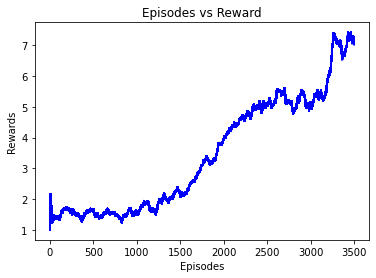

In [7]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state = env.reset()
    next_state = state
    life = number_lives

    HISTORY_SIZE = len(history)
    get_init_state(history, state[0], HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


# Visualize Agent Performance

BE AWARE THIS CODE BELOW MAY CRASH THE KERNEL IF YOU RUN THE SAME CELL TWICE.

Please save your model before running this portion of the code.

In [8]:
torch.save(agent.policy_net, "./save_model/breakout_dqn_latest.pth")

In [16]:
from gym.wrappers import RecordVideo # If importing monitor raises issues, try using `from gym.wrappers import RecordVideo`
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = RecordVideo(env, './video', force=True)
    return env

In [ ]:
display = Display(visible=0, size=(300, 200))
display.start()

# Load agent
agent.load_policy_net("./save_model/breakout_dqn_latest.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = gym.make('BreakoutDeterministic-v4')
env = wrap_env(env)

done = False
score = 0
step = 0
state = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state)

while not done:
    
    # Render breakout
    env.render()
#     show_state(env,step) # uncommenting this provides another way to visualize the game

    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state
    
    next_state, reward, done, info = env.step(action + 1)
        
    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['ale.lives'])
        
    life = info['ale.lives']
    r = np.clip(reward, -1, 1) 
    r = reward

    # Store the transition in memory 
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward
    
    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()
display.stop()

In [18]:
double_dqn = True # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4404\932857171.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4404\932857171.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:


episode: 0   score: 1.0   memory length: 169   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.0
episode: 1   score: 0.0   memory length: 292   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 0.5
episode: 2   score: 1.0   memory length: 443   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 0.6666666666666666
episode: 3   score: 1.0   memory length: 612   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 0.75
episode: 4   score: 3.0   memory length: 879   epsilon: 1.0    steps: 267    lr: 0.0001     evaluation reward: 1.2
episode: 5   score: 1.0   memory length: 1030   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.1666666666666667
episode: 6   score: 0.0   memory length: 1153   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.0
episode: 7   score: 2.0   memory length: 1333   epsilon: 1.0    steps: 180    lr: 0.0001     evaluation reward: 1.125
episode: 8   score: 4.0   memory length: 159

episode: 65   score: 2.0   memory length: 11493   epsilon: 1.0    steps: 200    lr: 0.0001     evaluation reward: 1.2878787878787878
episode: 66   score: 2.0   memory length: 11710   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.2985074626865671
episode: 67   score: 3.0   memory length: 11937   epsilon: 1.0    steps: 227    lr: 0.0001     evaluation reward: 1.3235294117647058
episode: 68   score: 0.0   memory length: 12060   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3043478260869565
episode: 69   score: 3.0   memory length: 12307   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.3285714285714285
episode: 70   score: 0.0   memory length: 12429   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.3098591549295775
episode: 71   score: 1.0   memory length: 12597   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.3055555555555556
episode: 72   score: 0.0   memory length: 12720   epsilon: 1.0    ste

episode: 130   score: 3.0   memory length: 22964   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.18
episode: 131   score: 3.0   memory length: 23231   epsilon: 1.0    steps: 267    lr: 0.0001     evaluation reward: 1.18
episode: 132   score: 1.0   memory length: 23400   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.19
episode: 133   score: 3.0   memory length: 23625   epsilon: 1.0    steps: 225    lr: 0.0001     evaluation reward: 1.22
episode: 134   score: 0.0   memory length: 23748   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.21
episode: 135   score: 0.0   memory length: 23871   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.19
episode: 136   score: 1.0   memory length: 24022   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.19
episode: 137   score: 0.0   memory length: 24145   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.19
episode: 138   score: 0.0   memory lengt

episode: 199   score: 1.0   memory length: 35121   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.42
episode: 200   score: 1.0   memory length: 35272   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.42
episode: 201   score: 0.0   memory length: 35395   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 202   score: 2.0   memory length: 35593   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.42
episode: 203   score: 2.0   memory length: 35791   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.44
episode: 204   score: 1.0   memory length: 35959   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.44
episode: 205   score: 0.0   memory length: 36082   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.44
episode: 206   score: 2.0   memory length: 36280   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.45
episode: 207   score: 2.0   memory length

episode: 268   score: 2.0   memory length: 48226   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.57
episode: 269   score: 1.0   memory length: 48398   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.55
episode: 270   score: 0.0   memory length: 48521   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.53
episode: 271   score: 3.0   memory length: 48768   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.51
episode: 272   score: 0.0   memory length: 48891   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 273   score: 2.0   memory length: 49109   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.52
episode: 274   score: 2.0   memory length: 49311   epsilon: 1.0    steps: 202    lr: 0.0001     evaluation reward: 1.54
episode: 275   score: 1.0   memory length: 49480   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.53
episode: 276   score: 2.0   memory lengt

episode: 337   score: 4.0   memory length: 60136   epsilon: 1.0    steps: 293    lr: 0.0001     evaluation reward: 1.32
episode: 338   score: 3.0   memory length: 60382   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.34
episode: 339   score: 0.0   memory length: 60504   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.34
episode: 340   score: 3.0   memory length: 60751   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.36
episode: 341   score: 3.0   memory length: 60984   epsilon: 1.0    steps: 233    lr: 0.0001     evaluation reward: 1.37
episode: 342   score: 2.0   memory length: 61199   epsilon: 1.0    steps: 215    lr: 0.0001     evaluation reward: 1.38
episode: 343   score: 4.0   memory length: 61475   epsilon: 1.0    steps: 276    lr: 0.0001     evaluation reward: 1.41
episode: 344   score: 2.0   memory length: 61696   epsilon: 1.0    steps: 221    lr: 0.0001     evaluation reward: 1.41
episode: 345   score: 2.0   memory lengt

episode: 406   score: 3.0   memory length: 72724   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.43
episode: 407   score: 2.0   memory length: 72922   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.44
episode: 408   score: 2.0   memory length: 73142   epsilon: 1.0    steps: 220    lr: 0.0001     evaluation reward: 1.43
episode: 409   score: 1.0   memory length: 73311   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.43
episode: 410   score: 0.0   memory length: 73433   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.43
episode: 411   score: 2.0   memory length: 73652   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.44
episode: 412   score: 4.0   memory length: 73968   epsilon: 1.0    steps: 316    lr: 0.0001     evaluation reward: 1.48
episode: 413   score: 4.0   memory length: 74266   epsilon: 1.0    steps: 298    lr: 0.0001     evaluation reward: 1.49
episode: 414   score: 3.0   memory lengt

episode: 475   score: 0.0   memory length: 85591   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.59
episode: 476   score: 3.0   memory length: 85816   epsilon: 1.0    steps: 225    lr: 0.0001     evaluation reward: 1.6
episode: 477   score: 1.0   memory length: 85985   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.6
episode: 478   score: 0.0   memory length: 86108   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.58
episode: 479   score: 2.0   memory length: 86306   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.6
episode: 480   score: 2.0   memory length: 86524   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.59
episode: 481   score: 0.0   memory length: 86647   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 482   score: 4.0   memory length: 86913   epsilon: 1.0    steps: 266    lr: 0.0001     evaluation reward: 1.59
episode: 483   score: 3.0   memory length: 

episode: 544   score: 3.0   memory length: 98388   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.52
episode: 545   score: 2.0   memory length: 98604   epsilon: 1.0    steps: 216    lr: 0.0001     evaluation reward: 1.53
episode: 546   score: 1.0   memory length: 98775   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.54
episode: 547   score: 3.0   memory length: 99020   epsilon: 1.0    steps: 245    lr: 0.0001     evaluation reward: 1.56
episode: 548   score: 2.0   memory length: 99237   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.58
episode: 549   score: 2.0   memory length: 99435   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.58
episode: 550   score: 3.0   memory length: 99662   epsilon: 1.0    steps: 227    lr: 0.0001     evaluation reward: 1.59
episode: 551   score: 2.0   memory length: 99860   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.61
episode: 552   score: 6.0   memory lengt

episode: 606   score: 3.0   memory length: 109856   epsilon: 0.9804831400004237    steps: 244    lr: 0.0001     evaluation reward: 1.48
episode: 607   score: 1.0   memory length: 110007   epsilon: 0.9801841600004302    steps: 151    lr: 0.0001     evaluation reward: 1.48
episode: 608   score: 2.0   memory length: 110205   epsilon: 0.9797921200004387    steps: 198    lr: 0.0001     evaluation reward: 1.5
episode: 609   score: 2.0   memory length: 110403   epsilon: 0.9794000800004472    steps: 198    lr: 0.0001     evaluation reward: 1.52
episode: 610   score: 1.0   memory length: 110554   epsilon: 0.9791011000004537    steps: 151    lr: 0.0001     evaluation reward: 1.53
episode: 611   score: 1.0   memory length: 110722   epsilon: 0.9787684600004609    steps: 168    lr: 0.0001     evaluation reward: 1.53
episode: 612   score: 0.0   memory length: 110845   epsilon: 0.9785249200004662    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 613   score: 2.0   memory length: 111043

episode: 667   score: 1.0   memory length: 120987   epsilon: 0.9584437600009021    steps: 168    lr: 0.0001     evaluation reward: 1.42
episode: 668   score: 1.0   memory length: 121156   epsilon: 0.9581091400009094    steps: 169    lr: 0.0001     evaluation reward: 1.4
episode: 669   score: 1.0   memory length: 121325   epsilon: 0.9577745200009167    steps: 169    lr: 0.0001     evaluation reward: 1.41
episode: 670   score: 2.0   memory length: 121507   epsilon: 0.9574141600009245    steps: 182    lr: 0.0001     evaluation reward: 1.42
episode: 671   score: 0.0   memory length: 121630   epsilon: 0.9571706200009298    steps: 123    lr: 0.0001     evaluation reward: 1.42
episode: 672   score: 3.0   memory length: 121861   epsilon: 0.9567132400009397    steps: 231    lr: 0.0001     evaluation reward: 1.44
episode: 673   score: 1.0   memory length: 122032   epsilon: 0.9563746600009471    steps: 171    lr: 0.0001     evaluation reward: 1.45
episode: 674   score: 1.0   memory length: 122200

episode: 728   score: 3.0   memory length: 132419   epsilon: 0.9358084000013935    steps: 212    lr: 0.0001     evaluation reward: 1.6
episode: 729   score: 2.0   memory length: 132618   epsilon: 0.9354143800014021    steps: 199    lr: 0.0001     evaluation reward: 1.6
episode: 730   score: 0.0   memory length: 132740   epsilon: 0.9351728200014073    steps: 122    lr: 0.0001     evaluation reward: 1.6
episode: 731   score: 1.0   memory length: 132908   epsilon: 0.9348401800014146    steps: 168    lr: 0.0001     evaluation reward: 1.59
episode: 732   score: 3.0   memory length: 133136   epsilon: 0.9343887400014244    steps: 228    lr: 0.0001     evaluation reward: 1.59
episode: 733   score: 0.0   memory length: 133259   epsilon: 0.9341452000014296    steps: 123    lr: 0.0001     evaluation reward: 1.58
episode: 734   score: 1.0   memory length: 133431   epsilon: 0.933804640001437    steps: 172    lr: 0.0001     evaluation reward: 1.57
episode: 735   score: 0.0   memory length: 133554   

episode: 789   score: 1.0   memory length: 144257   epsilon: 0.9123691600019024    steps: 172    lr: 0.0001     evaluation reward: 1.73
episode: 790   score: 3.0   memory length: 144503   epsilon: 0.911882080001913    steps: 246    lr: 0.0001     evaluation reward: 1.76
episode: 791   score: 0.0   memory length: 144625   epsilon: 0.9116405200019182    steps: 122    lr: 0.0001     evaluation reward: 1.76
episode: 792   score: 2.0   memory length: 144845   epsilon: 0.9112049200019277    steps: 220    lr: 0.0001     evaluation reward: 1.77
episode: 793   score: 1.0   memory length: 144996   epsilon: 0.9109059400019341    steps: 151    lr: 0.0001     evaluation reward: 1.76
episode: 794   score: 2.0   memory length: 145195   epsilon: 0.9105119200019427    steps: 199    lr: 0.0001     evaluation reward: 1.76
episode: 795   score: 2.0   memory length: 145393   epsilon: 0.9101198800019512    steps: 198    lr: 0.0001     evaluation reward: 1.75
episode: 796   score: 2.0   memory length: 145591

episode: 850   score: 1.0   memory length: 156444   epsilon: 0.8882389000024262    steps: 151    lr: 0.0001     evaluation reward: 2.01
episode: 851   score: 2.0   memory length: 156663   epsilon: 0.8878052800024356    steps: 219    lr: 0.0001     evaluation reward: 2.0
episode: 852   score: 0.0   memory length: 156786   epsilon: 0.8875617400024409    steps: 123    lr: 0.0001     evaluation reward: 1.98
episode: 853   score: 7.0   memory length: 157210   epsilon: 0.8867222200024591    steps: 424    lr: 0.0001     evaluation reward: 2.05
episode: 854   score: 5.0   memory length: 157476   epsilon: 0.8861955400024706    steps: 266    lr: 0.0001     evaluation reward: 2.04
episode: 855   score: 3.0   memory length: 157720   epsilon: 0.8857124200024811    steps: 244    lr: 0.0001     evaluation reward: 2.02
episode: 856   score: 3.0   memory length: 157968   epsilon: 0.8852213800024917    steps: 248    lr: 0.0001     evaluation reward: 2.03
episode: 857   score: 3.0   memory length: 158196

episode: 911   score: 2.0   memory length: 170169   epsilon: 0.8610634000030162    steps: 218    lr: 0.0001     evaluation reward: 2.4
episode: 912   score: 3.0   memory length: 170398   epsilon: 0.860609980003026    steps: 229    lr: 0.0001     evaluation reward: 2.41
episode: 913   score: 3.0   memory length: 170629   epsilon: 0.860152600003036    steps: 231    lr: 0.0001     evaluation reward: 2.42
episode: 914   score: 3.0   memory length: 170855   epsilon: 0.8597051200030457    steps: 226    lr: 0.0001     evaluation reward: 2.43
episode: 915   score: 1.0   memory length: 171026   epsilon: 0.859366540003053    steps: 171    lr: 0.0001     evaluation reward: 2.38
episode: 916   score: 0.0   memory length: 171149   epsilon: 0.8591230000030583    steps: 123    lr: 0.0001     evaluation reward: 2.35
episode: 917   score: 5.0   memory length: 171491   epsilon: 0.858445840003073    steps: 342    lr: 0.0001     evaluation reward: 2.37
episode: 918   score: 4.0   memory length: 171766   e

episode: 972   score: 3.0   memory length: 183722   epsilon: 0.8342284600035987    steps: 209    lr: 0.0001     evaluation reward: 2.58
episode: 973   score: 2.0   memory length: 183902   epsilon: 0.8338720600036065    steps: 180    lr: 0.0001     evaluation reward: 2.56
episode: 974   score: 2.0   memory length: 184101   epsilon: 0.833478040003615    steps: 199    lr: 0.0001     evaluation reward: 2.54
episode: 975   score: 3.0   memory length: 184327   epsilon: 0.8330305600036247    steps: 226    lr: 0.0001     evaluation reward: 2.56
episode: 976   score: 5.0   memory length: 184611   epsilon: 0.832468240003637    steps: 284    lr: 0.0001     evaluation reward: 2.58
episode: 977   score: 2.0   memory length: 184829   epsilon: 0.8320366000036463    steps: 218    lr: 0.0001     evaluation reward: 2.57
episode: 978   score: 1.0   memory length: 184981   epsilon: 0.8317356400036529    steps: 152    lr: 0.0001     evaluation reward: 2.58
episode: 979   score: 3.0   memory length: 185231 

episode: 1033   score: 3.0   memory length: 197496   epsilon: 0.8069559400041908    steps: 229    lr: 0.0001     evaluation reward: 2.58
episode: 1034   score: 4.0   memory length: 197789   epsilon: 0.8063758000042034    steps: 293    lr: 0.0001     evaluation reward: 2.59
episode: 1035   score: 1.0   memory length: 197959   epsilon: 0.8060392000042107    steps: 170    lr: 0.0001     evaluation reward: 2.55
episode: 1036   score: 0.0   memory length: 198082   epsilon: 0.805795660004216    steps: 123    lr: 0.0001     evaluation reward: 2.49
episode: 1037   score: 3.0   memory length: 198328   epsilon: 0.8053085800042266    steps: 246    lr: 0.0001     evaluation reward: 2.52
episode: 1038   score: 0.0   memory length: 198451   epsilon: 0.8050650400042318    steps: 123    lr: 0.0001     evaluation reward: 2.51
episode: 1039   score: 4.0   memory length: 198747   epsilon: 0.8044789600042446    steps: 296    lr: 0.0001     evaluation reward: 2.52
episode: 1040   score: 8.0   memory length

episode: 1093   score: 1.0   memory length: 212859   epsilon: 0.7765372000048512    steps: 152    lr: 0.0001     evaluation reward: 3.1
episode: 1094   score: 3.0   memory length: 213106   epsilon: 0.7760481400048618    steps: 247    lr: 0.0001     evaluation reward: 3.11
episode: 1095   score: 3.0   memory length: 213351   epsilon: 0.7755630400048723    steps: 245    lr: 0.0001     evaluation reward: 3.1
episode: 1096   score: 4.0   memory length: 213645   epsilon: 0.7749809200048849    steps: 294    lr: 0.0001     evaluation reward: 3.12
episode: 1097   score: 2.0   memory length: 213863   epsilon: 0.7745492800048943    steps: 218    lr: 0.0001     evaluation reward: 3.11
episode: 1098   score: 5.0   memory length: 214207   epsilon: 0.7738681600049091    steps: 344    lr: 0.0001     evaluation reward: 3.13
episode: 1099   score: 5.0   memory length: 214548   epsilon: 0.7731929800049238    steps: 341    lr: 0.0001     evaluation reward: 3.15
episode: 1100   score: 2.0   memory length:

episode: 1153   score: 3.0   memory length: 227372   epsilon: 0.747801460005475    steps: 230    lr: 0.0001     evaluation reward: 3.15
episode: 1154   score: 5.0   memory length: 227701   epsilon: 0.7471500400054891    steps: 329    lr: 0.0001     evaluation reward: 3.11
episode: 1155   score: 4.0   memory length: 228018   epsilon: 0.7465223800055028    steps: 317    lr: 0.0001     evaluation reward: 3.12
episode: 1156   score: 3.0   memory length: 228249   epsilon: 0.7460650000055127    steps: 231    lr: 0.0001     evaluation reward: 3.12
episode: 1157   score: 4.0   memory length: 228546   epsilon: 0.7454769400055254    steps: 297    lr: 0.0001     evaluation reward: 3.12
episode: 1158   score: 7.0   memory length: 228907   epsilon: 0.744762160005541    steps: 361    lr: 0.0001     evaluation reward: 3.16
episode: 1159   score: 4.0   memory length: 229200   epsilon: 0.7441820200055536    steps: 293    lr: 0.0001     evaluation reward: 3.15
episode: 1160   score: 8.0   memory length:

episode: 1213   score: 6.0   memory length: 244242   epsilon: 0.7143988600062001    steps: 353    lr: 0.0001     evaluation reward: 3.68
episode: 1214   score: 5.0   memory length: 244546   epsilon: 0.7137969400062132    steps: 304    lr: 0.0001     evaluation reward: 3.73
episode: 1215   score: 6.0   memory length: 244872   epsilon: 0.7131514600062272    steps: 326    lr: 0.0001     evaluation reward: 3.77
episode: 1216   score: 4.0   memory length: 245149   epsilon: 0.7126030000062391    steps: 277    lr: 0.0001     evaluation reward: 3.79
episode: 1217   score: 5.0   memory length: 245437   epsilon: 0.7120327600062515    steps: 288    lr: 0.0001     evaluation reward: 3.81
episode: 1218   score: 3.0   memory length: 245700   epsilon: 0.7115120200062628    steps: 263    lr: 0.0001     evaluation reward: 3.81
episode: 1219   score: 4.0   memory length: 245975   epsilon: 0.7109675200062746    steps: 275    lr: 0.0001     evaluation reward: 3.8
episode: 1220   score: 3.0   memory length

episode: 1273   score: 3.0   memory length: 261554   epsilon: 0.6801211000069443    steps: 247    lr: 0.0001     evaluation reward: 4.28
episode: 1274   score: 0.0   memory length: 261676   epsilon: 0.6798795400069495    steps: 122    lr: 0.0001     evaluation reward: 4.23
episode: 1275   score: 4.0   memory length: 261971   epsilon: 0.6792954400069622    steps: 295    lr: 0.0001     evaluation reward: 4.25
episode: 1276   score: 7.0   memory length: 262376   epsilon: 0.6784935400069796    steps: 405    lr: 0.0001     evaluation reward: 4.25
episode: 1277   score: 2.0   memory length: 262595   epsilon: 0.678059920006989    steps: 219    lr: 0.0001     evaluation reward: 4.26
episode: 1278   score: 7.0   memory length: 263019   epsilon: 0.6772204000070072    steps: 424    lr: 0.0001     evaluation reward: 4.24
episode: 1279   score: 3.0   memory length: 263228   epsilon: 0.6768065800070162    steps: 209    lr: 0.0001     evaluation reward: 4.25
episode: 1280   score: 3.0   memory length

episode: 1333   score: 6.0   memory length: 280001   epsilon: 0.6435960400077372    steps: 355    lr: 0.0001     evaluation reward: 4.61
episode: 1334   score: 3.0   memory length: 280230   epsilon: 0.643142620007747    steps: 229    lr: 0.0001     evaluation reward: 4.57
episode: 1335   score: 4.0   memory length: 280530   epsilon: 0.6425486200077599    steps: 300    lr: 0.0001     evaluation reward: 4.58
episode: 1336   score: 3.0   memory length: 280762   epsilon: 0.6420892600077699    steps: 232    lr: 0.0001     evaluation reward: 4.55
episode: 1337   score: 8.0   memory length: 281144   epsilon: 0.6413329000077863    steps: 382    lr: 0.0001     evaluation reward: 4.58
episode: 1338   score: 8.0   memory length: 281544   epsilon: 0.6405409000078035    steps: 400    lr: 0.0001     evaluation reward: 4.59
episode: 1339   score: 3.0   memory length: 281810   epsilon: 0.6400142200078149    steps: 266    lr: 0.0001     evaluation reward: 4.57
episode: 1340   score: 5.0   memory length

episode: 1393   score: 3.0   memory length: 299537   epsilon: 0.6049147600085769    steps: 229    lr: 0.0001     evaluation reward: 5.25
episode: 1394   score: 3.0   memory length: 299766   epsilon: 0.6044613400085868    steps: 229    lr: 0.0001     evaluation reward: 5.24
episode: 1395   score: 6.0   memory length: 300140   epsilon: 0.6037208200086028    steps: 374    lr: 0.0001     evaluation reward: 5.23
episode: 1396   score: 6.0   memory length: 300501   epsilon: 0.6030060400086183    steps: 361    lr: 0.0001     evaluation reward: 5.24
episode: 1397   score: 9.0   memory length: 300936   epsilon: 0.602144740008637    steps: 435    lr: 0.0001     evaluation reward: 5.29
episode: 1398   score: 5.0   memory length: 301246   epsilon: 0.6015309400086504    steps: 310    lr: 0.0001     evaluation reward: 5.3
episode: 1399   score: 9.0   memory length: 301686   epsilon: 0.6006597400086693    steps: 440    lr: 0.0001     evaluation reward: 5.36
episode: 1400   score: 9.0   memory length:

episode: 1453   score: 6.0   memory length: 320992   epsilon: 0.5624338600094991    steps: 358    lr: 0.0001     evaluation reward: 5.95
episode: 1454   score: 6.0   memory length: 321368   epsilon: 0.5616893800095153    steps: 376    lr: 0.0001     evaluation reward: 5.96
episode: 1455   score: 7.0   memory length: 321791   epsilon: 0.5608518400095335    steps: 423    lr: 0.0001     evaluation reward: 6.01
episode: 1456   score: 10.0   memory length: 322313   epsilon: 0.5598182800095559    steps: 522    lr: 0.0001     evaluation reward: 6.06
episode: 1457   score: 5.0   memory length: 322599   epsilon: 0.5592520000095682    steps: 286    lr: 0.0001     evaluation reward: 6.07
episode: 1458   score: 5.0   memory length: 322894   epsilon: 0.5586679000095809    steps: 295    lr: 0.0001     evaluation reward: 6.08
episode: 1459   score: 4.0   memory length: 323192   epsilon: 0.5580778600095937    steps: 298    lr: 0.0001     evaluation reward: 6.07
episode: 1460   score: 4.0   memory leng

episode: 1513   score: 3.0   memory length: 341937   epsilon: 0.5209627600103994    steps: 211    lr: 0.0001     evaluation reward: 6.03
episode: 1514   score: 7.0   memory length: 342330   epsilon: 0.5201846200104163    steps: 393    lr: 0.0001     evaluation reward: 6.07
episode: 1515   score: 5.0   memory length: 342656   epsilon: 0.5195391400104303    steps: 326    lr: 0.0001     evaluation reward: 6.04
episode: 1516   score: 4.0   memory length: 342919   epsilon: 0.5190184000104416    steps: 263    lr: 0.0001     evaluation reward: 6.02
episode: 1517   score: 5.0   memory length: 343245   epsilon: 0.5183729200104557    steps: 326    lr: 0.0001     evaluation reward: 6.01
episode: 1518   score: 9.0   memory length: 343717   epsilon: 0.5174383600104759    steps: 472    lr: 0.0001     evaluation reward: 6.02
episode: 1519   score: 10.0   memory length: 344268   epsilon: 0.5163473800104996    steps: 551    lr: 0.0001     evaluation reward: 6.0
episode: 1520   score: 8.0   memory lengt

episode: 1573   score: 8.0   memory length: 363974   epsilon: 0.47732950001071106    steps: 435    lr: 0.0001     evaluation reward: 6.22
episode: 1574   score: 10.0   memory length: 364461   epsilon: 0.47636524001070496    steps: 487    lr: 0.0001     evaluation reward: 6.27
episode: 1575   score: 9.0   memory length: 364989   epsilon: 0.47531980001069835    steps: 528    lr: 0.0001     evaluation reward: 6.33
episode: 1576   score: 4.0   memory length: 365288   epsilon: 0.4747277800106946    steps: 299    lr: 0.0001     evaluation reward: 6.32
episode: 1577   score: 3.0   memory length: 365501   epsilon: 0.47430604001069193    steps: 213    lr: 0.0001     evaluation reward: 6.31
episode: 1578   score: 10.0   memory length: 365996   epsilon: 0.47332594001068573    steps: 495    lr: 0.0001     evaluation reward: 6.33
episode: 1579   score: 8.0   memory length: 366386   epsilon: 0.47255374001068084    steps: 390    lr: 0.0001     evaluation reward: 6.36
episode: 1580   score: 8.0   memo

episode: 1633   score: 3.0   memory length: 388309   epsilon: 0.4291462000104062    steps: 249    lr: 0.0001     evaluation reward: 7.08
episode: 1634   score: 5.0   memory length: 388650   epsilon: 0.42847102001040194    steps: 341    lr: 0.0001     evaluation reward: 7.01
episode: 1635   score: 8.0   memory length: 389053   epsilon: 0.4276730800103969    steps: 403    lr: 0.0001     evaluation reward: 7.03
episode: 1636   score: 7.0   memory length: 389481   epsilon: 0.4268256400103915    steps: 428    lr: 0.0001     evaluation reward: 7.0
episode: 1637   score: 9.0   memory length: 389917   epsilon: 0.42596236001038607    steps: 436    lr: 0.0001     evaluation reward: 7.03
episode: 1638   score: 16.0   memory length: 390441   epsilon: 0.4249248400103795    steps: 524    lr: 0.0001     evaluation reward: 7.12
episode: 1639   score: 12.0   memory length: 391011   epsilon: 0.42379624001037236    steps: 570    lr: 0.0001     evaluation reward: 7.15
episode: 1640   score: 10.0   memory 

episode: 1693   score: 9.0   memory length: 412798   epsilon: 0.38065798001009943    steps: 514    lr: 0.0001     evaluation reward: 7.9
episode: 1694   score: 6.0   memory length: 413162   epsilon: 0.37993726001009487    steps: 364    lr: 0.0001     evaluation reward: 7.88
episode: 1695   score: 10.0   memory length: 413653   epsilon: 0.3789650800100887    steps: 491    lr: 0.0001     evaluation reward: 7.95
episode: 1696   score: 12.0   memory length: 414188   epsilon: 0.377905780010082    steps: 535    lr: 0.0001     evaluation reward: 8.01
episode: 1697   score: 10.0   memory length: 414722   epsilon: 0.3768484600100753    steps: 534    lr: 0.0001     evaluation reward: 8.04
episode: 1698   score: 14.0   memory length: 415347   epsilon: 0.3756109600100675    steps: 625    lr: 0.0001     evaluation reward: 8.09
episode: 1699   score: 20.0   memory length: 416000   epsilon: 0.3743180200100593    steps: 653    lr: 0.0001     evaluation reward: 8.23
episode: 1700   score: 6.0   memory 

episode: 1753   score: 5.0   memory length: 439287   epsilon: 0.3282097600097676    steps: 307    lr: 0.0001     evaluation reward: 8.62
episode: 1754   score: 12.0   memory length: 439887   epsilon: 0.3270217600097601    steps: 600    lr: 0.0001     evaluation reward: 8.61
episode: 1755   score: 13.0   memory length: 440499   epsilon: 0.3258100000097524    steps: 612    lr: 0.0001     evaluation reward: 8.69
episode: 1756   score: 11.0   memory length: 441031   epsilon: 0.32475664000974575    steps: 532    lr: 0.0001     evaluation reward: 8.76
episode: 1757   score: 9.0   memory length: 441527   epsilon: 0.32377456000973953    steps: 496    lr: 0.0001     evaluation reward: 8.75
episode: 1758   score: 9.0   memory length: 442008   epsilon: 0.3228221800097335    steps: 481    lr: 0.0001     evaluation reward: 8.77
episode: 1759   score: 25.0   memory length: 442766   epsilon: 0.321321340009724    steps: 758    lr: 0.0001     evaluation reward: 8.97
episode: 1760   score: 10.0   memory

episode: 1813   score: 9.0   memory length: 466132   epsilon: 0.2750566600094313    steps: 473    lr: 0.0001     evaluation reward: 9.32
episode: 1814   score: 12.0   memory length: 466618   epsilon: 0.2740943800094252    steps: 486    lr: 0.0001     evaluation reward: 9.35
episode: 1815   score: 8.0   memory length: 467042   epsilon: 0.2732548600094199    steps: 424    lr: 0.0001     evaluation reward: 9.31
episode: 1816   score: 12.0   memory length: 467626   epsilon: 0.2720985400094126    steps: 584    lr: 0.0001     evaluation reward: 9.32
episode: 1817   score: 9.0   memory length: 468078   epsilon: 0.2712035800094069    steps: 452    lr: 0.0001     evaluation reward: 9.33
episode: 1818   score: 23.0   memory length: 468689   epsilon: 0.26999380000939927    steps: 611    lr: 0.0001     evaluation reward: 9.49
episode: 1819   score: 14.0   memory length: 469234   epsilon: 0.26891470000939244    steps: 545    lr: 0.0001     evaluation reward: 9.54
episode: 1820   score: 13.0   memor

episode: 1873   score: 10.0   memory length: 494514   epsilon: 0.21886030000907575    steps: 506    lr: 0.0001     evaluation reward: 9.71
episode: 1874   score: 11.0   memory length: 495009   epsilon: 0.21788020000906955    steps: 495    lr: 0.0001     evaluation reward: 9.75
episode: 1875   score: 8.0   memory length: 495480   epsilon: 0.21694762000906365    steps: 471    lr: 0.0001     evaluation reward: 9.76
episode: 1876   score: 6.0   memory length: 495839   epsilon: 0.21623680000905915    steps: 359    lr: 0.0001     evaluation reward: 9.72
episode: 1877   score: 9.0   memory length: 496274   epsilon: 0.2153755000090537    steps: 435    lr: 0.0001     evaluation reward: 9.72
episode: 1878   score: 18.0   memory length: 496967   epsilon: 0.21400336000904502    steps: 693    lr: 0.0001     evaluation reward: 9.85
episode: 1879   score: 9.0   memory length: 497424   epsilon: 0.2130985000090393    steps: 457    lr: 0.0001     evaluation reward: 9.82
episode: 1880   score: 8.0   memo

episode: 1933   score: 17.0   memory length: 523115   epsilon: 0.16223032000871745    steps: 624    lr: 0.0001     evaluation reward: 10.2
episode: 1934   score: 19.0   memory length: 523769   epsilon: 0.16093540000870926    steps: 654    lr: 0.0001     evaluation reward: 10.19
episode: 1935   score: 14.0   memory length: 524361   epsilon: 0.15976324000870185    steps: 592    lr: 0.0001     evaluation reward: 10.25
episode: 1936   score: 6.0   memory length: 524680   epsilon: 0.15913162000869785    steps: 319    lr: 0.0001     evaluation reward: 10.25
episode: 1937   score: 9.0   memory length: 525115   epsilon: 0.1582703200086924    steps: 435    lr: 0.0001     evaluation reward: 10.25
episode: 1938   score: 12.0   memory length: 525640   epsilon: 0.15723082000868582    steps: 525    lr: 0.0001     evaluation reward: 10.28
episode: 1939   score: 9.0   memory length: 526121   epsilon: 0.1562784400086798    steps: 481    lr: 0.0001     evaluation reward: 10.28
episode: 1940   score: 11.

episode: 1992   score: 14.0   memory length: 552051   epsilon: 0.10493704000849559    steps: 547    lr: 0.0001     evaluation reward: 11.03
episode: 1993   score: 8.0   memory length: 552433   epsilon: 0.1041806800084961    steps: 382    lr: 0.0001     evaluation reward: 10.98
episode: 1994   score: 11.0   memory length: 552994   epsilon: 0.10306990000849686    steps: 561    lr: 0.0001     evaluation reward: 11.04
episode: 1995   score: 9.0   memory length: 553468   epsilon: 0.1021313800084975    steps: 474    lr: 0.0001     evaluation reward: 10.99
episode: 1996   score: 14.0   memory length: 553976   epsilon: 0.10112554000849819    steps: 508    lr: 0.0001     evaluation reward: 11.07
episode: 1997   score: 10.0   memory length: 554465   epsilon: 0.10015732000849885    steps: 489    lr: 0.0001     evaluation reward: 10.99
episode: 1998   score: 11.0   memory length: 555024   epsilon: 0.0990505000084996    steps: 559    lr: 0.0001     evaluation reward: 11.02
episode: 1999   score: 9.

episode: 2051   score: 12.0   memory length: 582774   epsilon: 0.04410550000853708    steps: 447    lr: 0.0001     evaluation reward: 11.76
episode: 2052   score: 7.0   memory length: 583201   epsilon: 0.043260040008537656    steps: 427    lr: 0.0001     evaluation reward: 11.66
episode: 2053   score: 15.0   memory length: 583752   epsilon: 0.0421690600085384    steps: 551    lr: 0.0001     evaluation reward: 11.66
episode: 2054   score: 10.0   memory length: 584262   epsilon: 0.04115926000853909    steps: 510    lr: 0.0001     evaluation reward: 11.66
episode: 2055   score: 9.0   memory length: 584702   epsilon: 0.04028806000853968    steps: 440    lr: 0.0001     evaluation reward: 11.69
episode: 2056   score: 20.0   memory length: 585411   epsilon: 0.03888424000854064    steps: 709    lr: 0.0001     evaluation reward: 11.82
episode: 2057   score: 9.0   memory length: 585894   epsilon: 0.03792790000854129    steps: 483    lr: 0.0001     evaluation reward: 11.82
episode: 2058   score: 

episode: 2110   score: 17.0   memory length: 616541   epsilon: 0.009998020008555413    steps: 558    lr: 0.0001     evaluation reward: 12.75
episode: 2111   score: 16.0   memory length: 617184   epsilon: 0.009998020008555413    steps: 643    lr: 0.0001     evaluation reward: 12.78
episode: 2112   score: 16.0   memory length: 617788   epsilon: 0.009998020008555413    steps: 604    lr: 0.0001     evaluation reward: 12.85
episode: 2113   score: 9.0   memory length: 618203   epsilon: 0.009998020008555413    steps: 415    lr: 0.0001     evaluation reward: 12.83
episode: 2114   score: 12.0   memory length: 618813   epsilon: 0.009998020008555413    steps: 610    lr: 0.0001     evaluation reward: 12.87
episode: 2115   score: 16.0   memory length: 619422   epsilon: 0.009998020008555413    steps: 609    lr: 0.0001     evaluation reward: 12.92
episode: 2116   score: 21.0   memory length: 620083   epsilon: 0.009998020008555413    steps: 661    lr: 0.0001     evaluation reward: 13.05
episode: 2117 

episode: 2169   score: 13.0   memory length: 649838   epsilon: 0.009998020008555413    steps: 534    lr: 0.0001     evaluation reward: 13.14
episode: 2170   score: 23.0   memory length: 650592   epsilon: 0.009998020008555413    steps: 754    lr: 0.0001     evaluation reward: 13.27
episode: 2171   score: 7.0   memory length: 650987   epsilon: 0.009998020008555413    steps: 395    lr: 0.0001     evaluation reward: 13.21
episode: 2172   score: 13.0   memory length: 651464   epsilon: 0.009998020008555413    steps: 477    lr: 0.0001     evaluation reward: 13.2
episode: 2173   score: 15.0   memory length: 652059   epsilon: 0.009998020008555413    steps: 595    lr: 0.0001     evaluation reward: 13.21
episode: 2174   score: 17.0   memory length: 652746   epsilon: 0.009998020008555413    steps: 687    lr: 0.0001     evaluation reward: 13.29
episode: 2175   score: 13.0   memory length: 653292   epsilon: 0.009998020008555413    steps: 546    lr: 0.0001     evaluation reward: 13.3
episode: 2176   

episode: 2228   score: 10.0   memory length: 684759   epsilon: 0.009998020008555413    steps: 467    lr: 0.0001     evaluation reward: 13.51
episode: 2229   score: 7.0   memory length: 685147   epsilon: 0.009998020008555413    steps: 388    lr: 0.0001     evaluation reward: 13.49
episode: 2230   score: 10.0   memory length: 685689   epsilon: 0.009998020008555413    steps: 542    lr: 0.0001     evaluation reward: 13.44
episode: 2231   score: 12.0   memory length: 686232   epsilon: 0.009998020008555413    steps: 543    lr: 0.0001     evaluation reward: 13.48
episode: 2232   score: 11.0   memory length: 686745   epsilon: 0.009998020008555413    steps: 513    lr: 0.0001     evaluation reward: 13.47
episode: 2233   score: 9.0   memory length: 687158   epsilon: 0.009998020008555413    steps: 413    lr: 0.0001     evaluation reward: 13.38
episode: 2234   score: 13.0   memory length: 687732   epsilon: 0.009998020008555413    steps: 574    lr: 0.0001     evaluation reward: 13.45
episode: 2235  

episode: 2287   score: 12.0   memory length: 721491   epsilon: 0.009998020008555413    steps: 592    lr: 0.0001     evaluation reward: 14.68
episode: 2288   score: 6.0   memory length: 721831   epsilon: 0.009998020008555413    steps: 340    lr: 0.0001     evaluation reward: 14.57
episode: 2289   score: 13.0   memory length: 722327   epsilon: 0.009998020008555413    steps: 496    lr: 0.0001     evaluation reward: 14.58
episode: 2290   score: 14.0   memory length: 722883   epsilon: 0.009998020008555413    steps: 556    lr: 0.0001     evaluation reward: 14.62
episode: 2291   score: 15.0   memory length: 723516   epsilon: 0.009998020008555413    steps: 633    lr: 0.0001     evaluation reward: 14.56
episode: 2292   score: 10.0   memory length: 724022   epsilon: 0.009998020008555413    steps: 506    lr: 0.0001     evaluation reward: 14.43
episode: 2293   score: 16.0   memory length: 724554   epsilon: 0.009998020008555413    steps: 532    lr: 0.0001     evaluation reward: 14.4
episode: 2294  

episode: 2346   score: 10.0   memory length: 754029   epsilon: 0.009998020008555413    steps: 468    lr: 0.0001     evaluation reward: 13.85
episode: 2347   score: 11.0   memory length: 754558   epsilon: 0.009998020008555413    steps: 529    lr: 0.0001     evaluation reward: 13.86
episode: 2348   score: 15.0   memory length: 755216   epsilon: 0.009998020008555413    steps: 658    lr: 0.0001     evaluation reward: 13.87
episode: 2349   score: 11.0   memory length: 755741   epsilon: 0.009998020008555413    steps: 525    lr: 0.0001     evaluation reward: 13.78
episode: 2350   score: 12.0   memory length: 756263   epsilon: 0.009998020008555413    steps: 522    lr: 0.0001     evaluation reward: 13.72
episode: 2351   score: 23.0   memory length: 756965   epsilon: 0.009998020008555413    steps: 702    lr: 0.0001     evaluation reward: 13.73
episode: 2352   score: 14.0   memory length: 757590   epsilon: 0.009998020008555413    steps: 625    lr: 0.0001     evaluation reward: 13.7
episode: 2353 

episode: 2405   score: 9.0   memory length: 786273   epsilon: 0.009998020008555413    steps: 487    lr: 0.0001     evaluation reward: 12.61
episode: 2406   score: 9.0   memory length: 786749   epsilon: 0.009998020008555413    steps: 476    lr: 0.0001     evaluation reward: 12.59
episode: 2407   score: 17.0   memory length: 787399   epsilon: 0.009998020008555413    steps: 650    lr: 0.0001     evaluation reward: 12.66
episode: 2408   score: 15.0   memory length: 788012   epsilon: 0.009998020008555413    steps: 613    lr: 0.0001     evaluation reward: 12.69
episode: 2409   score: 13.0   memory length: 788627   epsilon: 0.009998020008555413    steps: 615    lr: 0.0001     evaluation reward: 12.75
episode: 2410   score: 15.0   memory length: 789266   epsilon: 0.009998020008555413    steps: 639    lr: 0.0001     evaluation reward: 12.74
episode: 2411   score: 9.0   memory length: 789743   epsilon: 0.009998020008555413    steps: 477    lr: 0.0001     evaluation reward: 12.65
episode: 2412   

episode: 2464   score: 11.0   memory length: 820494   epsilon: 0.009998020008555413    steps: 531    lr: 0.0001     evaluation reward: 13.5
episode: 2465   score: 21.0   memory length: 821209   epsilon: 0.009998020008555413    steps: 715    lr: 0.0001     evaluation reward: 13.6
episode: 2466   score: 11.0   memory length: 821786   epsilon: 0.009998020008555413    steps: 577    lr: 0.0001     evaluation reward: 13.58
episode: 2467   score: 15.0   memory length: 822398   epsilon: 0.009998020008555413    steps: 612    lr: 0.0001     evaluation reward: 13.69
episode: 2468   score: 11.0   memory length: 822921   epsilon: 0.009998020008555413    steps: 523    lr: 0.0001     evaluation reward: 13.56
episode: 2469   score: 10.0   memory length: 823410   epsilon: 0.009998020008555413    steps: 489    lr: 0.0001     evaluation reward: 13.55
episode: 2470   score: 10.0   memory length: 823879   epsilon: 0.009998020008555413    steps: 469    lr: 0.0001     evaluation reward: 13.58
episode: 2471  

episode: 2523   score: 6.0   memory length: 853307   epsilon: 0.009998020008555413    steps: 379    lr: 0.0001     evaluation reward: 13.59
episode: 2524   score: 6.0   memory length: 853664   epsilon: 0.009998020008555413    steps: 357    lr: 0.0001     evaluation reward: 13.53
episode: 2525   score: 12.0   memory length: 854274   epsilon: 0.009998020008555413    steps: 610    lr: 0.0001     evaluation reward: 13.44
episode: 2526   score: 7.0   memory length: 854700   epsilon: 0.009998020008555413    steps: 426    lr: 0.0001     evaluation reward: 13.34
episode: 2527   score: 7.0   memory length: 855064   epsilon: 0.009998020008555413    steps: 364    lr: 0.0001     evaluation reward: 13.17
episode: 2528   score: 7.0   memory length: 855452   epsilon: 0.009998020008555413    steps: 388    lr: 0.0001     evaluation reward: 13.09
episode: 2529   score: 10.0   memory length: 856010   epsilon: 0.009998020008555413    steps: 558    lr: 0.0001     evaluation reward: 13.01
episode: 2530   sc

episode: 2582   score: 5.0   memory length: 883803   epsilon: 0.009998020008555413    steps: 290    lr: 0.0001     evaluation reward: 12.14
episode: 2583   score: 18.0   memory length: 884421   epsilon: 0.009998020008555413    steps: 618    lr: 0.0001     evaluation reward: 12.06
episode: 2584   score: 15.0   memory length: 884996   epsilon: 0.009998020008555413    steps: 575    lr: 0.0001     evaluation reward: 12.0
episode: 2585   score: 22.0   memory length: 885592   epsilon: 0.009998020008555413    steps: 596    lr: 0.0001     evaluation reward: 12.05
episode: 2586   score: 19.0   memory length: 886136   epsilon: 0.009998020008555413    steps: 544    lr: 0.0001     evaluation reward: 11.99
episode: 2587   score: 12.0   memory length: 886649   epsilon: 0.009998020008555413    steps: 513    lr: 0.0001     evaluation reward: 11.95
episode: 2588   score: 13.0   memory length: 887241   epsilon: 0.009998020008555413    steps: 592    lr: 0.0001     evaluation reward: 11.95
episode: 2589  

episode: 2641   score: 18.0   memory length: 915530   epsilon: 0.009998020008555413    steps: 669    lr: 0.0001     evaluation reward: 13.22
episode: 2642   score: 5.0   memory length: 915820   epsilon: 0.009998020008555413    steps: 290    lr: 0.0001     evaluation reward: 13.22
episode: 2643   score: 6.0   memory length: 916181   epsilon: 0.009998020008555413    steps: 361    lr: 0.0001     evaluation reward: 13.13
episode: 2644   score: 16.0   memory length: 916757   epsilon: 0.009998020008555413    steps: 576    lr: 0.0001     evaluation reward: 13.2
episode: 2645   score: 8.0   memory length: 917173   epsilon: 0.009998020008555413    steps: 416    lr: 0.0001     evaluation reward: 13.17
episode: 2646   score: 8.0   memory length: 917547   epsilon: 0.009998020008555413    steps: 374    lr: 0.0001     evaluation reward: 13.12
episode: 2647   score: 11.0   memory length: 918164   epsilon: 0.009998020008555413    steps: 617    lr: 0.0001     evaluation reward: 13.11
episode: 2648   sc

episode: 2700   score: 10.0   memory length: 945914   epsilon: 0.009998020008555413    steps: 466    lr: 0.0001     evaluation reward: 12.4
episode: 2701   score: 15.0   memory length: 946441   epsilon: 0.009998020008555413    steps: 527    lr: 0.0001     evaluation reward: 12.45
episode: 2702   score: 20.0   memory length: 947109   epsilon: 0.009998020008555413    steps: 668    lr: 0.0001     evaluation reward: 12.58
episode: 2703   score: 15.0   memory length: 947613   epsilon: 0.009998020008555413    steps: 504    lr: 0.0001     evaluation reward: 12.58
episode: 2704   score: 9.0   memory length: 948032   epsilon: 0.009998020008555413    steps: 419    lr: 0.0001     evaluation reward: 12.55
episode: 2705   score: 18.0   memory length: 948554   epsilon: 0.009998020008555413    steps: 522    lr: 0.0001     evaluation reward: 12.65
episode: 2706   score: 15.0   memory length: 949249   epsilon: 0.009998020008555413    steps: 695    lr: 0.0001     evaluation reward: 12.69
episode: 2707  

episode: 2759   score: 8.0   memory length: 979036   epsilon: 0.009998020008555413    steps: 422    lr: 0.0001     evaluation reward: 13.49
episode: 2760   score: 9.0   memory length: 979394   epsilon: 0.009998020008555413    steps: 358    lr: 0.0001     evaluation reward: 13.48
episode: 2761   score: 7.0   memory length: 979780   epsilon: 0.009998020008555413    steps: 386    lr: 0.0001     evaluation reward: 13.38
episode: 2762   score: 9.0   memory length: 980221   epsilon: 0.009998020008555413    steps: 441    lr: 0.0001     evaluation reward: 13.32
episode: 2763   score: 11.0   memory length: 980723   epsilon: 0.009998020008555413    steps: 502    lr: 0.0001     evaluation reward: 13.31
episode: 2764   score: 14.0   memory length: 981388   epsilon: 0.009998020008555413    steps: 665    lr: 0.0001     evaluation reward: 13.27
episode: 2765   score: 15.0   memory length: 981995   epsilon: 0.009998020008555413    steps: 607    lr: 0.0001     evaluation reward: 13.21
episode: 2766   s

episode: 2818   score: 15.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 581    lr: 0.0001     evaluation reward: 13.94
episode: 2819   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 587    lr: 0.0001     evaluation reward: 13.93
episode: 2820   score: 18.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 631    lr: 0.0001     evaluation reward: 14.0
episode: 2821   score: 20.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 495    lr: 0.0001     evaluation reward: 14.13
episode: 2822   score: 17.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 645    lr: 0.0001     evaluation reward: 14.13
episode: 2823   score: 19.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 731    lr: 0.0001     evaluation reward: 14.22
episode: 2824   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 525    lr: 0.0001     evaluation reward: 14.23
episode

episode: 2876   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 530    lr: 0.0001     evaluation reward: 13.55
episode: 2877   score: 10.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 463    lr: 0.0001     evaluation reward: 13.57
episode: 2878   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 279    lr: 0.0001     evaluation reward: 13.56
episode: 2879   score: 21.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 690    lr: 0.0001     evaluation reward: 13.68
episode: 2880   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 449    lr: 0.0001     evaluation reward: 13.61
episode: 2881   score: 20.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 715    lr: 0.0001     evaluation reward: 13.62
episode: 2882   score: 16.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 592    lr: 0.0001     evaluation reward: 13.66
episode:

episode: 2934   score: 22.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 817    lr: 0.0001     evaluation reward: 13.49
episode: 2935   score: 17.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 481    lr: 0.0001     evaluation reward: 13.51
episode: 2936   score: 7.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 377    lr: 0.0001     evaluation reward: 13.5
episode: 2937   score: 21.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 632    lr: 0.0001     evaluation reward: 13.52
episode: 2938   score: 13.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 478    lr: 0.0001     evaluation reward: 13.49
episode: 2939   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 457    lr: 0.0001     evaluation reward: 13.48
episode: 2940   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 437    lr: 0.0001     evaluation reward: 13.34
episode: 2

episode: 2992   score: 14.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 550    lr: 0.0001     evaluation reward: 14.1
episode: 2993   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 591    lr: 0.0001     evaluation reward: 14.11
episode: 2994   score: 14.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 504    lr: 0.0001     evaluation reward: 14.08
episode: 2995   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 360    lr: 0.0001     evaluation reward: 14.07
episode: 2996   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 560    lr: 0.0001     evaluation reward: 13.98
episode: 2997   score: 22.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 769    lr: 0.0001     evaluation reward: 14.11
episode: 2998   score: 15.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 522    lr: 0.0001     evaluation reward: 14.17
episode:

episode: 3050   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 560    lr: 0.0001     evaluation reward: 13.42
episode: 3051   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 408    lr: 0.0001     evaluation reward: 13.36
episode: 3052   score: 21.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 770    lr: 0.0001     evaluation reward: 13.5
episode: 3053   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 447    lr: 0.0001     evaluation reward: 13.48
episode: 3054   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 583    lr: 0.0001     evaluation reward: 13.43
episode: 3055   score: 10.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 519    lr: 0.0001     evaluation reward: 13.35
episode: 3056   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 382    lr: 0.0001     evaluation reward: 13.29
episode: 3

episode: 3108   score: 13.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 585    lr: 0.0001     evaluation reward: 13.12
episode: 3109   score: 14.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 506    lr: 0.0001     evaluation reward: 13.2
episode: 3110   score: 19.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 567    lr: 0.0001     evaluation reward: 13.24
episode: 3111   score: 7.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 378    lr: 0.0001     evaluation reward: 13.14
episode: 3112   score: 10.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 472    lr: 0.0001     evaluation reward: 13.11
episode: 3113   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 503    lr: 0.0001     evaluation reward: 13.04
episode: 3114   score: 15.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 592    lr: 0.0001     evaluation reward: 13.0
episode: 3

episode: 3166   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 540    lr: 0.0001     evaluation reward: 12.85
episode: 3167   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 375    lr: 0.0001     evaluation reward: 12.86
episode: 3168   score: 4.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 280    lr: 0.0001     evaluation reward: 12.75
episode: 3169   score: 15.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 661    lr: 0.0001     evaluation reward: 12.79
episode: 3170   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 451    lr: 0.0001     evaluation reward: 12.75
episode: 3171   score: 17.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 484    lr: 0.0001     evaluation reward: 12.77
episode: 3172   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 455    lr: 0.0001     evaluation reward: 12.67
episode: 3

episode: 3224   score: 13.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 636    lr: 0.0001     evaluation reward: 12.3
episode: 3225   score: 6.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 352    lr: 0.0001     evaluation reward: 12.18
episode: 3226   score: 13.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 481    lr: 0.0001     evaluation reward: 12.1
episode: 3227   score: 13.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 498    lr: 0.0001     evaluation reward: 12.14
episode: 3228   score: 10.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 550    lr: 0.0001     evaluation reward: 12.13
episode: 3229   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 294    lr: 0.0001     evaluation reward: 12.05
episode: 3230   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 468    lr: 0.0001     evaluation reward: 12.07
episode: 3

episode: 3282   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 560    lr: 0.0001     evaluation reward: 13.0
episode: 3283   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 572    lr: 0.0001     evaluation reward: 13.07
episode: 3284   score: 10.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 466    lr: 0.0001     evaluation reward: 13.05
episode: 3285   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 555    lr: 0.0001     evaluation reward: 13.04
episode: 3286   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 534    lr: 0.0001     evaluation reward: 12.98
episode: 3287   score: 18.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 607    lr: 0.0001     evaluation reward: 13.08
episode: 3288   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 508    lr: 0.0001     evaluation reward: 13.03
episode:

episode: 3340   score: 6.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 359    lr: 0.0001     evaluation reward: 12.48
episode: 3341   score: 12.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 582    lr: 0.0001     evaluation reward: 12.54
episode: 3342   score: 9.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 455    lr: 0.0001     evaluation reward: 12.59
episode: 3343   score: 14.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 400    lr: 0.0001     evaluation reward: 12.6
episode: 3344   score: 10.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 476    lr: 0.0001     evaluation reward: 12.52
episode: 3345   score: 11.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 559    lr: 0.0001     evaluation reward: 12.48
episode: 3346   score: 8.0   memory length: 1000000   epsilon: 0.009998020008555413    steps: 441    lr: 0.0001     evaluation reward: 12.46
episode: 3

KeyboardInterrupt: 

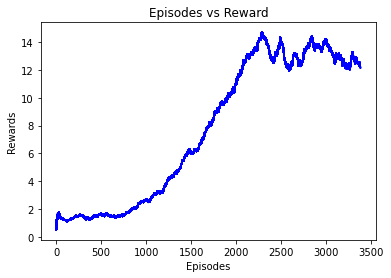

In [19]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    state = env.reset()
    next_state = state
    life = number_lives

    HISTORY_SIZE = len(history)
    get_init_state(history, state[0], HISTORY_SIZE)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['lives'])

        life = info['lives']
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_ddqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_ddqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


In [20]:
torch.save(agent.policy_net, "./save_model/breakout_ddqn_latest.pth")